### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

#### Dataset descriptions
**train.csv:** Contains 172 columns. The primary key that represents each customer is id. The target variable that you need to predict is churn_probability which contains a value of 0 or 1. This data is what you are going to use for EDA, cleaning, feature engineering, model building, model evaluation, model selection, and finally model training.

**test.csv:** Contains 171 columns, doesn't contain the target variable churn_probability. You will apply all the necessary preprocessing steps to get this data into the right format and then use the model trained using the train.csv file to make predictions with this. This is unseen data! Only the competition hosts know the actual values of the target feature for this data and therefore your submissions will be evaluated on how well your model does with this dataset.

**sample.csv:** This contains the format in which you need to submit the solutions to Kaggle. The id column in this dataset exactly the same as the id column in test.csv. You will make your predictions on the test.csv data and store them in a submission file that has the same format as this file. Check the Overview>Evaluation tab for mode details.

**data_dictionary.csv:** This contains the definitions for the various acronyms that you will need to understand each variable. For example, the variable total_og_mou_7, contains the acronyms total, og, mou, and 7, which can be translated as the total outgoing minutes of voice calls made by the user in month of July

## Importing required libraries

In [2714]:
## import required libraries initially
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

## Loading the Data Dictionary

In [2715]:
DD_df = pd.read_csv("data_dictionary.csv",sep=',')
DD_df

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

## Loading the data from csv into a dataframe

In [2716]:
train_df = pd.read_csv("train.csv",sep=',')

In [2717]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [2718]:
train_df.head(5)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [2719]:
train_df.shape

(69999, 172)

#### Summary of the dataset : 69998 rows, 172 columns
#### The train data has 172 columns and 69998 rows. Now we will try to clean the data and prepare it for analysis

## Let us understand the columns based on data dictionary


### Checking the Object Columns first

In [2720]:
train_df.select_dtypes(['object']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

### Seems these are date field from its name so lets change its dtype to DateTime

In [2721]:
### Seems these are date field from its name so lets change its dtype
dateCols = train_df.select_dtypes(['object']).columns
train_df[dateCols].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/22/2014           7/10/2014           8/24/2014   
1           6/12/2014           7/10/2014           8/26/2014   
2           6/11/2014           7/22/2014           8/24/2014   
3           6/15/2014           7/21/2014           8/25/2014   
4           6/25/2014           7/26/2014           8/30/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                      NaN                      NaN                      NaN  
1                      NaN                 7/8/2014                      NaN  
2                      NaN                      NaN                      NaN  
3                      NaN                      NaN                      NaN  
4                6/25/2014                7/23/2014                8/20/2014

In [2722]:
for col in dateCols:
    train_df[col]=pd.to_datetime(train_df[col])

In [2723]:
train_df[dateCols].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0          2014-06-22          2014-07-10          2014-08-24   
1          2014-06-12          2014-07-10          2014-08-26   
2          2014-06-11          2014-07-22          2014-08-24   
3          2014-06-15          2014-07-21          2014-08-25   
4          2014-06-25          2014-07-26          2014-08-30   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                      NaT                      NaT                      NaT  
1                      NaT               2014-07-08                      NaT  
2                      NaT                      NaT                      NaT  
3                      NaT                      NaT                      NaT  
4               2014-06-25               2014-07-23               2014-08-20

In [2724]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: datetime64[ns](9), float64(135), int64(28)
memory usage: 91.9 MB


#### we have **9** Date Time fields ( Saw above)

 ##### we have **9** fields related to 3 months (6,7, 8 i.e June July & August) # datetime64(9)
    
  - last_date_of_month_6, last_date_of_month_7, last_date_of_month_8: **This is calendar last date of the month**
  - date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8: **Last date in a month when recharge was done**
  - date_of_last_rech_data_6,  date_of_last_rech_data_7, date_of_last_rech_data_8: **Last date in a month when Data/Mobile internet recharge was done**

#### We have **28** Integer fields int64(28)

 - id : **Unique record number / consumer number**
 - circle_id : **Telecom circle area**
 - total_rech_num_6, total_rech_num_7, total_rech_num_8 : **Total number of recharge done in June, July & Aug respective months.**
 - total_rech_amt_6, total_rech_amt_7, total_rech_amt_8 : **Total recharge amount in June, July & Aug respective months.**
 - max_rech_amt_6, max_rech_amt_7, max_rech_amt_8 : **Maximum recharge amount in June, July & Aug respective months (in local currency)**
 - last_day_rch_amt_6, last_day_rch_amt_7, last_day_rch_amt_8: **Last day of month recharge amount (assumed)**
 - monthly_2g_6, monthly_2g_7, monthly_2g_8: **2G service with  validity for a month**
 - sachet_2g_6, sachet_2g_7, sachet_2g_8 : **2G Service schemes with validity smaller than a month**
 - monthly_3g_6, monthly_3g_7, monthly_3g_8	: **3G service with  validity for a month**
 - sachet_3g_6, sachet_3g_7, sachet_3g_8: **3G Service schemes with validity smaller than a month**

In [2725]:
dateCols = train_df.select_dtypes(['int64']).columns
train_df[dateCols].head()

id  circle_id  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0   0        109                 3                 2                 2   
1   1        109                 3                 4                 5   
2   2        109                 2                 4                 2   
3   3        109                 2                 4                 3   
4   4        109                13                10                 8   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0                77                65                10              65   
1                 0               145                50               0   
2                70               120                 0              70   
3               160               240               130             110   
4               290               136               122              50   

   max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0              65              10                  65                  65   
1             145              50                   0                   0   
2              70               0                  70                  50   
3             110              50                 110                 110   
4              41              30                  25                  10   

   last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
0                   0             0             0             0            0   
1                   0             0             0             0            0   
2                   0             0             0             0            0   
3                  50             0             0             0            0   
4                  30             0             0             0            7   

   sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
0            0            0             0             0             0   
1            0            0             0             1             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            6            6             0             0             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  churn_probability  
0            0            0            0  1958                  0  
1            0            0            0   710                  0  
2            0            0            0   882                  0  
3            0            0            0   982                  0  
4            0            1            0   647                  0

#### Let us now understand the float fields

#### We have 135 Float fields float64(135)

In [2726]:
floatCols = train_df.select_dtypes(['float64']).columns
train_df[floatCols].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0   31.277   87.009    7.527   
1             0.0             0.0             0.0    0.000  122.787   42.953   
2             0.0             0.0             0.0   60.806  103.176    0.000   
3             0.0             0.0             0.0  156.362  205.260  111.095   
4             0.0             0.0             0.0  240.708  128.191  101.565   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        48.58       124.38         1.29         32.24         96.68   
1         0.00         0.00         0.00          0.00         25.99   
2         0.53        15.93         0.00         53.99         82.05   
3         7.26        16.01         0.00         68.76         78.48   
4        21.28         4.83         6.13         56.99         38.11   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          2.33           0.00            0.0            0.0           0.00   
1         30.89           0.00            0.0            0.0           0.00   
2          0.00           0.00            0.0            0.0           0.00   
3         50.23           0.00            0.0            0.0           0.00   
4          9.63          53.64            0.0            0.0          15.73   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0           0.00              2.23              0.00   
1            0.0           0.00              0.00              0.00   
2            0.0           0.00              0.53             12.98   
3            0.0           1.63              6.99              3.94   
4            0.0           0.00             10.16              4.83   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.28              5.29             16.04              2.33   
1              0.00              0.00              0.00              0.00   
2              0.00             24.11              0.00              0.00   
3              0.00             37.91             44.89             23.63   
4              6.13             36.74             19.88              4.61   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              2.14   
3              0.00              0.00              0.00              0.00   
4             11.99              1.23              5.01              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          7.53         16.04   
1             22.01             29.79          0.00          0.00   
2              0.00              0.00         24.64         12.98   
3              0.00              8.03         44.91         48.84   
4              9.85              0.00         58.91         25.94   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          2.61             46.34            124.38              1.01   
1          0.00              0.00              0.00              0.00   
2          0.00              0.00              2.94              0.00   
3         23.63              0.26             12.06              0.00   
4         15.76              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             18.75             80.61               0.0              0.00   
1              0.00              0.00               0.0              0.00   
2             28.94             82.05               0.0              0.00   
3             15.33             25.93               4.6              0.56   
4              4.35   

In [2727]:
#to print all columns using list
list_floatCols = list(floatCols)
print(list_floatCols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

- STD :STD calls  outside the calling circle
- IC  :Incoming calls
- OG  :Outgoing calls
- T2T :Operator T to T ie within same operator mobile to mobile
- T2M :Operator T to other operator mobile
- T2O :Operator T to other operator fixed line
- T2F :Operator T to fixed lines of T
- T2C :Operator T to its own call center
- ARPU:Average revenue per user
- MOU :Minutes of usage  voice calls
- SPL: Special calls
- ONNET :All kind of calls within the same operator network
- OFFNET:All kind of calls outside the operator T network
- ROAM:	Indicates that customer is in roaming zone during the call

###### Other please refer above for data disctionary, this is just copied here to avoid scrolling



#### Understanding all columns based on data disctionary
- loc_og_t2o_mou, std_og_t2o_mou: **Local & STD - outgoing calls - Operator T to other operator fixed line - Minutes of usage voice calls**
- loc_ic_t2o_mou: **Local Incoming calls - Operator T to other operator fixed line - Minutes of usage voice calls**
- arpu_6, arpu_7, arpu_8: **Average revenue per user for June, July & August month respectively (resp)**
- onnet_mou_6, onnet_mou_7, onnet_mou_8: **Minutes of usage for all calls within same operator network for months resp.**
- offnet_mou_6, offnet_mou_7, offnet_mou_8: **Minutes of usage for all calls outside same operator network for months resp.**
- roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8: **In-coming calls Minutes of usage while customer is in roaming zone**
- roam_og_mou_6, roam_og_mou_7, roam_og_mou_8: **Out-going calls Minutes of usage while customer is in roaming zone**
- 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8','loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8': **Local outgoing Minutes of usage based on operator Network T2T, T2M, T2O, T2F, T2C for June, July and August**  
- 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'" **Local outgoing Minutes of usage for June, July and August**
- 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8': **Local in-coming Minutes of usage based on operator Network T2T, T2M, T2O, T2F for June, July and August**
- 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8': **Local in-coming Minutes of usage for June, July and August**
- 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8': **STD outgoing Minutes of usage based on operator Network T2T, T2M, T2O, T2F, T2C for June, July and August**  
- 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8': **STD outgoing Minutes of usage for June, July and August**


- 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8': **STD in-coming Minutes of usage based on operator Network T2T, T2M, T2O, T2F for June, July and August**

- 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8': **STD in-coming Minutes of usage for June, July and August**


- 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8': **ISD outgoing Minutes of usage for June, July and August**
- 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8': **ISD in-coming Minutes of usage for June, July and August**


- 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8': **Special calls outgoing Minutes of usage for June, July and August**
- 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8': **Special calls in-coming Minutes of usage for June, July and August**

- 'og_others_6', 'og_others_7', 'og_others_8': **Others outgoing calls for June, July and August**
- 'ic_others_6', 'ic_others_7', 'ic_others_8': **Others in-coming calls for June, July and August**

- 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8': **Total outgoing Minutes of usage for June, July and August**

- 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'**Total in-coming Minutes of usage for June, July and August**


### Similarly we can understand below fields also
- RECH    	Recharge
- DATA    	Mobile internet
- MAX    	Maximum -- related fields
    - 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'
    - 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'


- RECH    	Recharge
- 3G    	3G network
- 2G    	2G network -- related fields
    - 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
    - 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'


- AV    	Average
- RECH    	Recharge
- AMT    	Amount in local currency
- DATA    	Mobile internet -- related fields
    - 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'

- VOL    	Mobile internet usage volume in MB
- 3G    	3G network
- 2G    	2G network -- relaed fields
    - 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
    - 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'

- ARPU    	Average revenue per user
- 3G    	3G network
    - 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 
    - 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'


- NIGHT    	Scheme to use during specific night hours only
- PCK    	Prepaid service schemes called  PACKS
    - 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 


- FB_USER	Service scheme to avail services of Facebook and similar social networking sites
    - 'fb_user_6', 'fb_user_7', 'fb_user_8'


- VBC -	Volume based cost  when no specific scheme is not purchased and paid as per usage
    - 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'

# Missing data

In [2728]:
#missing data
#check missing values in percentage, in descending order to see larger missing value column on top
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
arpu_3g_6                 52431  74.902499
count_rech_2g_6           52431  74.902499
night_pck_user_6          52431  74.902499
arpu_2g_6                 52431  74.902499
date_of_last_rech_data_6  52431  74.902499
total_rech_data_6         52431  74.902499
av_rech_amt_data_6        52431  74.902499
max_rech_data_6           52431  74.902499
count_rech_3g_6           52431  74.902499
fb_user_6                 52431  74.902499
night_pck_user_7          52134  74.478207
date_of_last_rech_data_7  52134  74.478207
total_rech_data_7         52134  74.478207
max_rech_data_7           52134  74.478207
fb_user_7                 52134  74.478207
count_rech_2g_7           52134  74.478207
count_rech_3g_7           52134  74.478207
arpu_3g_7                 52134  74.478207
av_rech_amt_data_7        52134  74.478207
arpu_2g_7                 52134  74.478207

### There are multiple columns where missing value is greater than 70%, lets check which are all these columns to understand if we can drop these columns

Before we proceed further for imputation, we need to tackle couple of steps
1. Filter the data for High value customers
    - As we see in the problem statement, we need to predict the churn only for high-value customers i.e., the top 20% customers who contribute to 80% of the revenue
    - This will also help in reducing the processing power as we will deal with less data than that entire dataset (~100K)
2. We will then proceed with median imputation of NULL values

## Filter high value customers

In [2729]:
train_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_data_6', 'total_rech_data_7', 
    'av_rech_amt_data_6', 'av_rech_amt_data_7']].isna().sum()

total_rech_amt_6          0
total_rech_amt_7          0
total_rech_data_6     52431
total_rech_data_7     52134
av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
dtype: int64

In [2730]:
# Calculate total recharge data amount for months 6 and 7
train_df['total_rech_amt_data_6'] = train_df['total_rech_data_6'] * train_df['av_rech_amt_data_6']
train_df['total_rech_amt_data_7'] = train_df['total_rech_data_7'] * train_df['av_rech_amt_data_7']

In [2731]:
# Calculate total recharge amount for both mobile and data
train_df['total_rech_amt_6_combined'] = train_df['total_rech_amt_6'] + train_df['total_rech_amt_data_6']
train_df['total_rech_amt_7_combined'] = train_df['total_rech_amt_7'] + train_df['total_rech_amt_data_7']

In [2732]:
# Calculate average recharge done by the customer in June and July (6 & 7)
train_df['av_rech_amt_6_7'] = (train_df['total_rech_amt_6_combined'] + train_df['total_rech_amt_7_combined']) / 2

In [2733]:
# Calculate 70th percentile average recharge amount
percentile_70_value = train_df['av_rech_amt_6_7'].quantile(q=0.7)
percentile_70_value

1215.0

In [2734]:
#Retain only those customers who have recharged their mobiles with >= 70th percentile
train_df[train_df['av_rech_amt_6_7']>= percentile_70_value].shape

(3895, 177)

In [2735]:
train_df_orig = train_df.copy()

In [2736]:
train_df = train_df[train_df['av_rech_amt_6_7']>= percentile_70_value].copy()

In [2737]:
train_df.shape

(3895, 177)

### check missing values in percentage > 70%

In [2738]:
# check missing values in percentage > 70%
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Percent > 70]

Empty DataFrame
Columns: [Total, Percent]
Index: []

### check for missing values for RECHARGE related columns, so that based on it we can decide if we need to delete the columns or impute it with proper value

In [2739]:
# Lets check and treat column RECH - Recharge
rech_cols=train_df.columns[train_df.columns.str.contains('rech')]
rech_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_6_combined', 'total_rech_amt_7_combined',
       'av_rech_amt_6_7'],
      dtype='object')

In [2740]:
# check for missing values for recharge related columns
train_df_rech_cols = train_df[rech_cols]
total = train_df_rech_cols.isnull().sum().sort_values(ascending=False)
percent = (100*train_df_rech_cols.isnull().sum()/train_df_rech_cols.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Percent>0]

Total    Percent
total_rech_data_8           422  10.834403
av_rech_amt_data_8          422  10.834403
date_of_last_rech_data_8    422  10.834403
count_rech_2g_8             422  10.834403
count_rech_3g_8             422  10.834403
max_rech_data_8             422  10.834403
date_of_last_rech_8          34   0.872914

#### We can see that for below columns, the same missing percentage is same.
 - date_of_last_rech_data_x 
 - total_rech_data_x
 - max_rech_data_x
 - count_rech_2g_X,
 - count_rech_3g_X and 
 - av_rech_amt_data_x' 

where x = 6,7,8 indicates for all 3 months respectively

#### That means the user hasn't done any recharge hence we can impute those with 0

In [2741]:
train_df['date_of_last_rech_data_8']=train_df['date_of_last_rech_data_8'].fillna(0)

In [2742]:
train_df['total_rech_data_8']=train_df['total_rech_data_8'].fillna(0)

In [2743]:
train_df['max_rech_data_8']=train_df['max_rech_data_8'].fillna(0)

In [2744]:
train_df['count_rech_2g_8']=train_df['av_rech_amt_data_8'].fillna(0)

In [2745]:
train_df['count_rech_3g_8']=train_df['av_rech_amt_data_8'].fillna(0)

In [2746]:
train_df['av_rech_amt_data_8']=train_df['av_rech_amt_data_8'].fillna(0)

## There is no month wise total DATA recharge amount provided, hence we need to multiply the number of data recharges with the average recharge amount for that particular month

In [2747]:
train_df['total_rech_data_amt_6'] = train_df['av_rech_amt_data_6'] * train_df['total_rech_data_6']
train_df['total_rech_data_amt_7'] = train_df['av_rech_amt_data_7'] * train_df['total_rech_data_7']
train_df['total_rech_data_amt_8'] = train_df['av_rech_amt_data_8'] * train_df['total_rech_data_8']

In [2748]:
train_df['total_rech_data_amt_8'].isnull().sum()

0

In [2749]:
train_df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

In [2750]:
train_df.shape

(3895, 174)

### Check futher for missing values

In [2751]:
#missing data
#check missing values in percentage, in descending order to see larger missing value column on top
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
arpu_3g_8           422  10.834403
arpu_2g_8           422  10.834403
night_pck_user_8    422  10.834403
fb_user_8           422  10.834403
isd_og_mou_8        126   3.234917
loc_og_t2m_mou_8    126   3.234917
std_ic_t2t_mou_8    126   3.234917
std_og_t2c_mou_8    126   3.234917
loc_og_t2t_mou_8    126   3.234917
loc_ic_mou_8        126   3.234917
std_og_t2t_mou_8    126   3.234917
loc_og_t2f_mou_8    126   3.234917
loc_ic_t2f_mou_8    126   3.234917
spl_og_mou_8        126   3.234917
std_ic_t2m_mou_8    126   3.234917
loc_ic_t2m_mou_8    126   3.234917
loc_og_t2c_mou_8    126   3.234917
loc_ic_t2t_mou_8    126   3.234917
roam_og_mou_8       126   3.234917
og_others_8         126   3.234917

#### Let's check the columns with no variance or having one value in their values and drop such columns

In [2752]:
uniqueValueCol_df = train_df.nunique()

In [2753]:
uniqueValueCol_df[uniqueValueCol_df==1]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

In [2754]:
uniqueValueCol_df[uniqueValueCol_df==1].index

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [2755]:
uniqueValueCols = uniqueValueCol_df[uniqueValueCol_df==1].index
train_df.drop(uniqueValueCols,axis=1,inplace = True)

In [2756]:
train_df.shape

(3895, 161)

### Check futher for missing values

In [2757]:
#missing data
#check missing values in percentage, in descending order to see larger missing value column on top
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
night_pck_user_8    422  10.834403
fb_user_8           422  10.834403
arpu_3g_8           422  10.834403
arpu_2g_8           422  10.834403
loc_ic_t2m_mou_8    126   3.234917
loc_og_t2f_mou_8    126   3.234917
loc_ic_mou_8        126   3.234917
loc_og_t2c_mou_8    126   3.234917
loc_ic_t2f_mou_8    126   3.234917
loc_og_mou_8        126   3.234917
loc_ic_t2t_mou_8    126   3.234917
std_og_t2t_mou_8    126   3.234917
std_ic_t2m_mou_8    126   3.234917
std_og_t2m_mou_8    126   3.234917
og_others_8         126   3.234917
std_og_t2f_mou_8    126   3.234917
spl_og_mou_8        126   3.234917
std_og_mou_8        126   3.234917
loc_og_t2m_mou_8    126   3.234917
std_ic_t2t_mou_8    126   3.234917

In [2758]:
# check for missing values for "ARPU - Average revenue per user" related columns
ARPU_cols=train_df.columns[train_df.columns.str.contains('arpu')]
ARPU_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [2759]:
# check for missing values for recharge related columns
train_df_arpu_cols = train_df[ARPU_cols]
total = train_df_arpu_cols.isnull().sum().sort_values(ascending=False)
percent = (100*train_df_arpu_cols.isnull().sum()/train_df_arpu_cols.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total    Percent
arpu_3g_8    422  10.834403
arpu_2g_8    422  10.834403
arpu_6         0   0.000000
arpu_7         0   0.000000
arpu_8         0   0.000000
arpu_3g_6      0   0.000000
arpu_3g_7      0   0.000000
arpu_2g_6      0   0.000000
arpu_2g_7      0   0.000000

In [2760]:
#arpu_2G3G_Cols =  ['arpu_3g_6', 'arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8']
arpu_2G3G_Cols =  ['arpu_3g_8','arpu_2g_8']
train_df[arpu_2G3G_Cols].describe()

arpu_3g_8    arpu_2g_8
count  3473.000000  3473.000000
mean    189.876228   176.000536
std     303.955736   276.161828
min     -20.040000    -9.190000
25%       0.000000     0.710000
50%      63.960000    63.960000
75%     243.420000   215.290000
max    3483.620000  3467.170000

#### box plot

------------ arpu_3g_8 ------------------


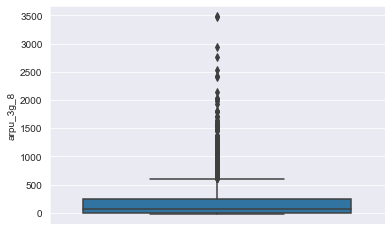

------------ arpu_2g_8 ------------------


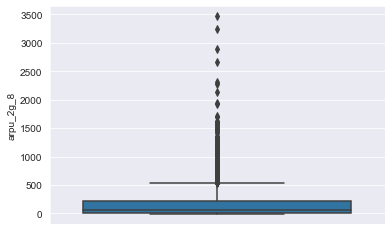

In [2761]:
for col in arpu_2G3G_Cols:
    print("------------", col ,"------------------")
    sns.boxplot(y=train_df[col])
    plt.show()

In [2762]:
## Dropping these columns
train_df.drop(arpu_2G3G_Cols,1,inplace=True)
train_df.shape

(3895, 159)

### Check futher for missing values

In [2763]:
#missing data
#check missing values in percentage, in descending order to see larger missing value column on top
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
fb_user_8           422  10.834403
night_pck_user_8    422  10.834403
loc_ic_t2m_mou_8    126   3.234917
loc_og_mou_8        126   3.234917
std_ic_t2t_mou_8    126   3.234917
loc_og_t2f_mou_8    126   3.234917
loc_ic_mou_8        126   3.234917
loc_og_t2c_mou_8    126   3.234917
loc_ic_t2f_mou_8    126   3.234917
loc_ic_t2t_mou_8    126   3.234917
std_ic_t2m_mou_8    126   3.234917
std_og_t2t_mou_8    126   3.234917
og_others_8         126   3.234917
std_og_t2m_mou_8    126   3.234917
spl_og_mou_8        126   3.234917
std_og_t2f_mou_8    126   3.234917
isd_og_mou_8        126   3.234917
std_og_mou_8        126   3.234917
loc_og_t2m_mou_8    126   3.234917
loc_og_t2t_mou_8    126   3.234917

In [2764]:
#nightPack_fb_Cols =  ['night_pck_user_6', 'fb_user_6', 'night_pck_user_7','fb_user_7', 'fb_user_8','night_pck_user_8' ]
nightPack_fb_Cols =  ['fb_user_8','night_pck_user_8' ]
train_df[nightPack_fb_Cols].describe()

fb_user_8  night_pck_user_8
count  3473.000000       3473.000000
mean      0.980708          0.030521
std       0.137568          0.172041
min       0.000000          0.000000
25%       1.000000          0.000000
50%       1.000000          0.000000
75%       1.000000          0.000000
max       1.000000          1.000000

In [2765]:
# check for missing values for nightPack_fb_Cols columns
train_df_mou_cols = train_df[nightPack_fb_Cols]
total = train_df_mou_cols.isnull().sum().sort_values(ascending=False)
percent = (100*train_df_mou_cols.isnull().sum()/train_df_mou_cols.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data #[missing_data.Percent >4]

Total    Percent
fb_user_8           422  10.834403
night_pck_user_8    422  10.834403

In [2766]:
for col in nightPack_fb_Cols:
    print ( col," -> ", train_df[col].unique())

fb_user_8  ->  [ 1. nan  0.]
night_pck_user_8  ->  [ 0. nan  1.]


In [2767]:
## Dropping these columns
#Cols_drop = ['night_pck_user_6', 'fb_user_6', 'night_pck_user_7','fb_user_7', 'fb_user_8','night_pck_user_8' ]
Cols_drop = ['fb_user_8','night_pck_user_8' ]
train_df.drop(Cols_drop,1,inplace=True)
train_df.shape

(3895, 157)

In [2768]:
train_df.shape

(3895, 157)

#### Check futher for missing values

In [2769]:
#missing data
#check missing values in percentage, in descending order to see larger missing value column on top
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
std_ic_mou_8        126  3.234917
std_ic_t2t_mou_8    126  3.234917
std_og_t2f_mou_8    126  3.234917
isd_og_mou_8        126  3.234917
std_og_t2m_mou_8    126  3.234917
spl_og_mou_8        126  3.234917
std_og_t2t_mou_8    126  3.234917
og_others_8         126  3.234917
loc_og_mou_8        126  3.234917
loc_ic_t2t_mou_8    126  3.234917
loc_og_t2c_mou_8    126  3.234917
loc_ic_t2m_mou_8    126  3.234917
loc_og_t2f_mou_8    126  3.234917
loc_ic_t2f_mou_8    126  3.234917
loc_og_t2m_mou_8    126  3.234917
loc_og_t2t_mou_8    126  3.234917
loc_ic_mou_8        126  3.234917
std_og_mou_8        126  3.234917
ic_others_8         126  3.234917
std_ic_t2m_mou_8    126  3.234917

In [2770]:
# check for missing values for "MOU - Minutes of usage" related columns
MOU_cols=train_df.columns[train_df.columns.str.contains('mou')]
MOU_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [2771]:
# check for missing values for MOU columns
train_df_mou_cols = train_df[MOU_cols]
total = train_df_mou_cols.isnull().sum().sort_values(ascending=False)
percent = (100*train_df_mou_cols.isnull().sum()/train_df_mou_cols.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data [missing_data.Percent >2]

Total   Percent
isd_ic_mou_8        126  3.234917
loc_ic_t2t_mou_8    126  3.234917
loc_ic_t2m_mou_8    126  3.234917
std_og_t2t_mou_8    126  3.234917
loc_og_t2c_mou_8    126  3.234917
loc_ic_t2f_mou_8    126  3.234917
loc_og_t2f_mou_8    126  3.234917
loc_ic_mou_8        126  3.234917
std_og_mou_8        126  3.234917
loc_og_t2m_mou_8    126  3.234917
std_ic_t2t_mou_8    126  3.234917
spl_og_mou_8        126  3.234917
loc_og_t2t_mou_8    126  3.234917
std_ic_t2m_mou_8    126  3.234917
std_og_t2m_mou_8    126  3.234917
roam_og_mou_8       126  3.234917
std_ic_t2f_mou_8    126  3.234917
roam_ic_mou_8       126  3.234917
std_ic_mou_8        126  3.234917
isd_og_mou_8        126  3.234917
offnet_mou_8        126  3.234917
spl_ic_mou_8        126  3.234917
std_og_t2f_mou_8    126  3.234917
onnet_mou_8         126  3.234917
loc_og_mou_8        126  3.234917

In [2772]:
missing_data [((missing_data.Percent <=3) & (missing_data.Percent >0))]

Total   Percent
spl_og_mou_7         72  1.848524
loc_ic_t2t_mou_7     72  1.848524
std_ic_t2t_mou_7     72  1.848524
loc_ic_t2m_mou_7     72  1.848524
loc_ic_t2f_mou_7     72  1.848524
loc_ic_mou_7         72  1.848524
std_ic_t2m_mou_7     72  1.848524
std_ic_t2f_mou_7     72  1.848524
std_ic_mou_7         72  1.848524
spl_ic_mou_7         72  1.848524
isd_ic_mou_7         72  1.848524
onnet_mou_7          72  1.848524
isd_og_mou_7         72  1.848524
std_og_mou_7         72  1.848524
std_og_t2t_mou_7     72  1.848524
offnet_mou_7         72  1.848524
roam_ic_mou_7        72  1.848524
roam_og_mou_7        72  1.848524
loc_og_t2t_mou_7     72  1.848524
loc_og_t2m_mou_7     72  1.848524
loc_og_t2c_mou_7     72  1.848524
loc_og_mou_7         72  1.848524
loc_og_t2f_mou_7     72  1.848524
std_og_t2f_mou_7     72  1.848524
std_og_t2m_mou_7     72  1.848524
loc_ic_t2t_mou_6     66  1.694480
std_og_t2m_mou_6     66  1.694480
offnet_mou_6         66  1.694480
isd_ic_mou_6         66  1.694480
std_og_mou_6         66  1.694480
roam_ic_mou_6        66  1.694480
spl_ic_mou_6         66  1.694480
roam_og_mou_6        66  1.694480
std_ic_mou_6         66  1.694480
spl_og_mou_6         66  1.694480
loc_og_t2t_mou_6     66  1.694480
std_ic_t2f_mou_6     66  1.694480
std_og_t2f_mou_6     66  1.694480
loc_og_t2m_mou_6     66  1.694480
std_ic_t2m_mou_6     66  1.694480
loc_og_mou_6         66  1.694480
loc_ic_t2m_mou_6     66  1.694480
std_og_t2t_mou_6     66  1.694480
loc_ic_t2f_mou_6     66  1.694480
loc_og_t2f_mou_6     66  1.694480
onnet_mou_6          66  1.694480
loc_ic_mou_6         66  1.694480
loc_og_t2c_mou_6     66  1.694480
isd_og_mou_6         66  1.694480
std_ic_t2t_mou_6     66  1.694480

#### from the missing values for above column, related to the Minutes of Usage means, the customer has not used the particular call type, hence we can fill the missing values with zero.

In [2773]:
train_df[MOU_cols] = train_df[MOU_cols].fillna(0)

In [2774]:
# check for missing values for MOU columns
train_df_mou_cols = train_df[MOU_cols]
total = train_df_mou_cols.isnull().sum().sort_values(ascending=False)
percent = (100*train_df_mou_cols.isnull().sum()/train_df_mou_cols.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data [missing_data.Percent >0]

Empty DataFrame
Columns: [Total, Percent]
Index: []

#### No missing value for MOU_cols

#### Check further for missing values

In [2775]:
#missing data
#check missing values in percentage, in descending order to see larger missing value column on top
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data [missing_data.Percent >1]

Total   Percent
ic_others_8    126  3.234917
og_others_8    126  3.234917
ic_others_7     72  1.848524
og_others_7     72  1.848524
og_others_6     66  1.694480
ic_others_6     66  1.694480

In [2776]:
to_drop_cols = missing_data [missing_data.Percent >1].index

In [2777]:
train_df.drop(to_drop_cols,1,inplace=True)
train_df.shape

(3895, 151)

#### Check futher for missing values

In [2778]:
#missing data
#check missing values in percentage, in descending order to see larger missing value column on top
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (100*train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data [missing_data.Percent >0.5]

Total   Percent
date_of_last_rech_8     34  0.872914

In [2779]:
train_df['date_of_last_rech_8'].unique()

array(['2014-08-30T00:00:00.000000000', '2014-08-23T00:00:00.000000000',
       '2014-08-22T00:00:00.000000000', '2014-08-25T00:00:00.000000000',
       '2014-08-26T00:00:00.000000000', '2014-08-29T00:00:00.000000000',
       '2014-08-24T00:00:00.000000000', '2014-08-31T00:00:00.000000000',
       '2014-08-28T00:00:00.000000000', '2014-08-12T00:00:00.000000000',
       '2014-08-17T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000', '2014-08-20T00:00:00.000000000',
       '2014-08-15T00:00:00.000000000',                           'NaT',
       '2014-08-19T00:00:00.000000000', '2014-08-11T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2014-08-05T00:00:00.000000000',
       '2014-08-14T00:00:00.000000000', '2014-08-18T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-08-13T00:00:00.000000000',
       '2014-08-09T00:00:00.000000000', '2014-08-10T00:00:00.000000000',
       '2014-08-07T00:00:00.000000000', '2014-08-08

In [2780]:
date_cols=list(filter(lambda x:'date' in x,list(train_df.columns)))
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [2781]:
# We will drop all the date columns since this will not add any more values to the analysis

In [2782]:
train_df.drop(date_cols,1,inplace=True)
train_df.shape

(3895, 145)

In [2783]:
# following the naming convention of other columns, renaming below columns accordingly
train_df = train_df.rename({'jun_vbc_3g' : 'vbc_3g_6'}, axis=1)
train_df = train_df.rename({'jul_vbc_3g' : 'vbc_3g_7'}, axis=1)
train_df = train_df.rename({'aug_vbc_3g' : 'vbc_3g_8'}, axis=1)

#### Churn Distribution

In [2784]:
train_df['churn_probability'].unique()

array([0, 1], dtype=int64)

In [2785]:
train_df['churn_probability'].value_counts()

0    3695
1     200
Name: churn_probability, dtype: int64

In [2786]:
# Churn Distribution
train_df['churn_probability'].value_counts(normalize=True).to_frame()

churn_probability
0           0.948652
1           0.051348

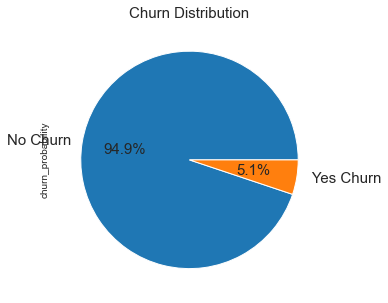

In [2787]:
pie_chart = train_df['churn_probability'].value_counts()*100.0 /len(train_df)
pc = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No Churn', ' Yes Churn'],figsize =(5,5), fontsize = 15)  
pc.set_title('Churn Distribution', fontsize = 15)
plt.show()

In [2788]:
train_df.describe()

id       arpu_6       arpu_7       arpu_8  onnet_mou_6  \
count   3895.000000  3895.000000  3895.000000  3895.000000  3895.000000   
mean   35014.992811   657.611222   670.945387   596.640004   193.305743   
std    20195.863704   495.438927   506.424600   515.927652   430.259864   
min        4.000000     0.000000    -0.172000   -17.854000     0.000000   
25%    17628.500000   292.350500   293.803500   228.692000     6.420000   
50%    35319.000000   543.399000   559.650000   453.855000    43.290000   
75%    52417.000000   891.193000   896.427000   818.762000   175.615000   
max    69993.000000  5034.040000  5298.833000  6255.086000  6504.340000   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  3895.000000  3895.000000   3895.000000   3895.000000   3895.000000   
mean    197.785107   180.909576    315.553109    309.990888    289.055959   
std     493.081586   459.738834    487.605523    468.598700    453.567996   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       5.440000     4.660000     36.040000     32.210000     26.810000   
50%      40.940000    36.440000    144.880000    144.710000    129.630000   
75%     168.110000   151.945000    387.450000    400.130000    371.195000   
max    8157.780000  9977.410000   6712.810000   7043.980000   7857.780000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count    3895.000000    3895.000000    3895.000000    3895.000000   
mean       15.008236      13.197091      14.136347      24.696757   
std        68.395487      87.852662      77.196781     132.924481   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      1216.660000    2877.060000    1968.490000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count    3895.000000    3895.000000       3895.000000       3895.000000   
mean       18.389127      18.816780         89.110629         94.444983   
std        92.293724      97.896055        264.958663        328.866362   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          2.460000          2.520000   
50%         0.000000       0.000000         19.530000         19.530000   
75%         0.000000       0.000000         72.295000         73.485000   
max      1659.880000    2237.690000       6093.340000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count       3895.000000       3895.000000       3895.000000       3895.000000   
mean          85.946493        165.681479        165.267954        156.756460   
std          307.384081        268.304496        255.533145        243.388811   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.590000         15.485000         13.935000         10.600000   
50%           17.140000         68.060000         68.910000         63.410000   
75%           68.705000        212.560000        207.925000        197.560000   
max         9760.560000       4696.830000       2295.380000       2331.190000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count       3895.000000       3895.000000       3895.000000       3895.000000   
mean           6.460834          6.472475          5.814270          1.797117   
std           18.725997         18.147828         16.081391          5.993067   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.230000          0.300000          0.000000          0.000000   
75%            4.640000          4.670000          4

### The telecom company has many users with negative average revenues in June, July and August months (arpu_x 6,7,8). These users are likely to churn

### We can drop id column which is not going to contribute to our analysis

In [2789]:
train_df=train_df.drop(['id'],axis=1)

In [2790]:
train_df.describe()

arpu_6       arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  \
count  3895.000000  3895.000000  3895.000000  3895.000000  3895.000000   
mean    657.611222   670.945387   596.640004   193.305743   197.785107   
std     495.438927   506.424600   515.927652   430.259864   493.081586   
min       0.000000    -0.172000   -17.854000     0.000000     0.000000   
25%     292.350500   293.803500   228.692000     6.420000     5.440000   
50%     543.399000   559.650000   453.855000    43.290000    40.940000   
75%     891.193000   896.427000   818.762000   175.615000   168.110000   
max    5034.040000  5298.833000  6255.086000  6504.340000  8157.780000   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  3895.000000   3895.000000   3895.000000   3895.000000    3895.000000   
mean    180.909576    315.553109    309.990888    289.055959      15.008236   
std     459.738834    487.605523    468.598700    453.567996      68.395487   
min       0.000000      0.000000      0.000000      0.000000       0.000000   
25%       4.660000     36.040000     32.210000     26.810000       0.000000   
50%      36.440000    144.880000    144.710000    129.630000       0.000000   
75%     151.945000    387.450000    400.130000    371.195000       0.000000   
max    9977.410000   6712.810000   7043.980000   7857.780000    1216.660000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    3895.000000    3895.000000    3895.000000    3895.000000   
mean       13.197091      14.136347      24.696757      18.389127   
std        87.852662      77.196781     132.924481      92.293724   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2877.060000    1968.490000    3775.110000    1659.880000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    3895.000000       3895.000000       3895.000000       3895.000000   
mean       18.816780         89.110629         94.444983         85.946493   
std        97.896055        264.958663        328.866362        307.384081   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          2.460000          2.520000          1.590000   
50%         0.000000         19.530000         19.530000         17.140000   
75%         0.000000         72.295000         73.485000         68.705000   
max      2237.690000       6093.340000       7400.660000       9760.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count       3895.000000       3895.000000       3895.000000       3895.000000   
mean         165.681479        165.267954        156.756460          6.460834   
std          268.304496        255.533145        243.388811         18.725997   
min            0.000000          0.000000          0.000000          0.000000   
25%           15.485000         13.935000         10.600000          0.000000   
50%           68.060000         68.910000         63.410000          0.230000   
75%          212.560000        207.925000        197.560000          4.640000   
max         4696.830000       2295.380000       2331.190000        325.940000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count       3895.000000       3895.000000       3895.000000       3895.000000   
mean           6.472475          5.814270          1.797117          2.077902   
std           18.147828         16.081391          5.993067          8.249919   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.300000          0.000000          0.000000          0.000000   
75%        

In [2791]:
#lets check correlation between columns
corr_data = train_df.corr()
corr_data

arpu_6    arpu_7    arpu_8  onnet_mou_6  \
arpu_6                     1.000000  0.740908  0.678402     0.422805   
arpu_7                     0.740908  1.000000  0.748206     0.333600   
arpu_8                     0.678402  0.748206  1.000000     0.278779   
onnet_mou_6                0.422805  0.333600  0.278779     1.000000   
onnet_mou_7                0.315934  0.368202  0.303012     0.763314   
onnet_mou_8                0.303434  0.339927  0.379433     0.682012   
offnet_mou_6               0.586772  0.470541  0.424805     0.201833   
offnet_mou_7               0.485801  0.550671  0.466564     0.174906   
offnet_mou_8               0.441742  0.476902  0.593532     0.161192   
roam_ic_mou_6              0.223113  0.189893  0.161911     0.131580   
roam_ic_mou_7              0.129005  0.130097  0.115378     0.073274   
roam_ic_mou_8              0.146130  0.137184  0.149116     0.172678   
roam_og_mou_6              0.273581  0.211581  0.172965     0.179203   
roam_og_mou_7              0.232869  0.254309  0.177406     0.159170   
roam_og_mou_8              0.204135  0.185419  0.220677     0.128704   
loc_og_t2t_mou_6           0.237611  0.207239  0.197895     0.622345   
loc_og_t2t_mou_7           0.196617  0.234532  0.207632     0.508706   
loc_og_t2t_mou_8           0.197993  0.222550  0.237300     0.459067   
loc_og_t2m_mou_6           0.476056  0.375871  0.401246     0.148244   
loc_og_t2m_mou_7           0.402355  0.437198  0.414908     0.114224   
loc_og_t2m_mou_8           0.389479  0.397569  0.488452     0.115062   
loc_og_t2f_mou_6           0.243036  0.212735  0.202396     0.046130   
loc_og_t2f_mou_7           0.244854  0.257743  0.242418     0.045128   
loc_og_t2f_mou_8           0.233214  0.241710  0.266596     0.041882   
loc_og_t2c_mou_6           0.047980  0.031477  0.022352     0.058957   
loc_og_t2c_mou_7          -0.003311  0.041159  0.008652     0.032799   
loc_og_t2c_mou_8           0.001667  0.039296  0.045977     0.037246   
loc_og_mou_6               0.465006  0.380466  0.390323     0.489531   
loc_og_mou_7               0.379657  0.427370  0.394642     0.435712   
loc_og_mou_8               0.368497  0.390814  0.453355     0.392498   
std_og_t2t_mou_6           0.320404  0.238259  0.183510     0.769234   
std_og_t2t_mou_7           0.228406  0.263535  0.209339     0.556735   
std_og_t2t_mou_8           0.214139  0.245964  0.282611     0.496354   
std_og_t2m_mou_6           0.344316  0.280272  0.207481     0.129751   
std_og_t2m_mou_7           0.288418  0.338051  0.258060     0.125674   
std_og_t2m_mou_8           0.244507  0.283122  0.358720     0.110063   
std_og_t2f_mou_6           0.110453  0.114498  0.118854     0.002456   
std_og_t2f_mou_7           0.100358  0.123240  0.120945     0.008194   
std_og_t2f_mou_8           0.093347  0.109582  0.125285     0.004200   
std_og_mou_6               0.438386  0.343545  0.259334     0.560578   
std_og_mou_7               0.339669  0.395539  0.307811     0.443158   
std_og_mou_8               0.301075  0.347390  0.421554     0.387644   
isd_og_mou_6               0.180406  0.139548  0.133405     0.017123   
isd_og_mou_7               0.102353  0.151552  0.118111     0.006460   
isd_og_mou_8               0.121267  0.132087  0.190019     0.010178   
spl_og_mou_6               0.110047  0.073227  0.060025     0.117021   
spl_og_mou_7               0.038948  0.089653  0.054688     0.109049   
spl_og_mou_8               0.039466  0.070986  0.099067     0.107042   
total_og_mou_6             0.624496  0.498655  0.439636     0.729339   
total_og_mou_7             0.497900  0.572741  0.483794     0.610560   
total_og_mou_8             0.458049  0.507940  0.604682     0.536883   
loc_ic_t2t_mou_6           0.144776  0.114379  0.119889     0.187858   
loc_ic_t2t_mou_7           0.141843  0.143001  0.148350     0.161082   
loc_ic_t2t_mou_8           0.154390  0.154559  0.182619     0.175469   
loc_ic_t2m_mou_6           0.292329  0.242353  0.244300     0.061641 

#### Code to get the correlation in order, highest correlation is on top of the table

In [2792]:
#Code to get the correlation in order, highest correlation is on top of the table
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("\nTop Absolute Correlations")
# Setting option to display all the rows and columns in dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(get_top_abs_correlations(train_df))
# Setting option to display all the rows and columns in dataset
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)


Top Absolute Correlations
total_rech_amt_data_6      total_rech_data_amt_6        1.000000
count_rech_2g_8            count_rech_3g_8              1.000000
total_rech_amt_data_7      total_rech_data_amt_7        1.000000
count_rech_2g_7            sachet_2g_7                  0.993545
count_rech_2g_6            sachet_2g_6                  0.992915
total_rech_amt_7_combined  total_rech_data_amt_7        0.979971
total_rech_amt_data_7      total_rech_amt_7_combined    0.979971
total_rech_amt_6_combined  total_rech_data_amt_6        0.975736
total_rech_amt_data_6      total_rech_amt_6_combined    0.975736
arpu_8                     total_rech_amt_8             0.968198
arpu_6                     total_rech_amt_6             0.967404
arpu_7                     total_rech_amt_7             0.963343
arpu_3g_7                  arpu_2g_7                    0.952999
arpu_3g_6                  arpu_2g_6                    0.942821
loc_ic_mou_6               total_ic_mou_6               0.91758

In [2793]:
corr_matrix = train_df.corr().abs()
#print(corr_matrix)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper_tri


arpu_6    arpu_7    arpu_8  onnet_mou_6  \
arpu_6                        NaN  0.740908  0.678402     0.422805   
arpu_7                        NaN       NaN  0.748206     0.333600   
arpu_8                        NaN       NaN       NaN     0.278779   
onnet_mou_6                   NaN       NaN       NaN          NaN   
onnet_mou_7                   NaN       NaN       NaN          NaN   
...                           ...       ...       ...          ...   
total_rech_amt_7_combined     NaN       NaN       NaN          NaN   
av_rech_amt_6_7               NaN       NaN       NaN          NaN   
total_rech_data_amt_6         NaN       NaN       NaN          NaN   
total_rech_data_amt_7         NaN       NaN       NaN          NaN   
total_rech_data_amt_8         NaN       NaN       NaN          NaN   

                           onnet_mou_7  onnet_mou_8  offnet_mou_6  \
arpu_6                        0.315934     0.303434      0.586772   
arpu_7                        0.368202     0.339927      0.470541   
arpu_8                        0.303012     0.379433      0.424805   
onnet_mou_6                   0.763314     0.682012      0.201833   
onnet_mou_7                        NaN     0.870334      0.184048   
...                                ...          ...           ...   
total_rech_amt_7_combined          NaN          NaN           NaN   
av_rech_amt_6_7                    NaN          NaN           NaN   
total_rech_data_amt_6              NaN          NaN           NaN   
total_rech_data_amt_7              NaN          NaN           NaN   
total_rech_data_amt_8              NaN          NaN           NaN   

                           offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
arpu_6                         0.485801      0.441742       0.223113  ...   
arpu_7                         0.550671      0.476902       0.189893  ...   
arpu_8                         0.466564      0.593532       0.161911  ...   
onnet_mou_6                    0.174906      0.161192       0.131580  ...   
onnet_mou_7                    0.179904      0.178843       0.135998  ...   
...                                 ...           ...            ...  ...   
total_rech_amt_7_combined           NaN           NaN            NaN  ...   
av_rech_amt_6_7                     NaN           NaN            NaN  ...   
total_rech_data_amt_6               NaN           NaN            NaN  ...   
total_rech_data_amt_7               NaN           NaN            NaN  ...   
total_rech_data_amt_8               NaN           NaN            NaN  ...   

                           vbc_3g_6  churn_probability  total_rech_amt_data_6  \
arpu_6                     0.291040           0.016655               0.110525   
arpu_7                     0.226206           0.012422               0.029986   
arpu_8                     0.221411           0.122204               0.005506   
onnet_mou_6                0.010485           0.011670               0.089388   
onnet_mou_7                0.013743           0.001320               0.092952   
...                             ...                ...                    ...   
total_rech_amt_7_combined       NaN                NaN                    NaN   
av_rech_amt_6_7                 NaN                NaN                    NaN   
total_rech_data_amt_6           NaN                NaN                    NaN   
total_rech_data_amt_7           NaN                NaN                    NaN   
total_rech_data_amt_8           NaN                NaN                    NaN   

                           total_rech_amt_data_7  total_rech_amt_6_combined  \
arpu_6                                  0.053214                   0.318288   
arpu_7                                  0.136462                   0.133824   
arpu_8                                  0.029874                   0.140575   
onnet_mou_6                             0.078279                   0.007292   
onnet_mou_7                             0.083106                

#### Columns to be dropped which have high correlation

In [2794]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

to_drop

['arpu_7',
 'arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',


In [2795]:
# Dropping the columns with high correlation
train_df.drop(to_drop, axis=1, inplace=True)

In [2796]:
train_df.shape

(3895, 43)

In [2797]:
train_df.head(5)

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  \
4    240.708        21.28         56.99          53.64           0.00   
27   390.489         8.58        133.16           0.00           0.00   
45  1361.775       872.16        410.56           8.83         149.04   
53   687.930       104.84        149.78           0.00           0.00   
63   241.317         7.91         11.48           0.00           0.00   

    roam_ic_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
4             0.0             36.74             11.99              0.00   
27            0.0             96.91             33.71              0.00   
45            0.0            167.34              0.00              2.44   
53            0.0            149.78              0.00              0.00   
63            0.0             11.48              0.00              0.00   

    loc_og_t2c_mou_7  ...  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
4               9.85  ...             0             0             0   
27              0.00  ...             1             0             0   
45              0.25  ...             0             0             0   
53              0.00  ...             2             2             1   
63              0.00  ...             0             0             0   

    fb_user_6   aon  vbc_3g_8  churn_probability  total_rech_amt_data_6  \
4         1.0   647      0.00                  0                 1225.0   
27        1.0   573    700.40                  0                  820.0   
45        1.0   942    132.74                  0                  369.0   
53        1.0  1194    425.33                  0                  792.0   
63        1.0   317    214.17                  0                 1372.0   

    total_rech_amt_data_7  total_rech_data_amt_8  
4                  1337.0                  852.0  
27                  608.0                  642.0  
45                 1050.0                   41.0  
53                  792.0                  198.0  
63                  900.0                  625.0  

[5 rows x 43 columns]

In [2798]:
##plt.figure(figsize=(20,10))
##corr_data = train_df.corr()
##sns.heatmap(data=train_df,annot=True,cmap="YlGnBu")
##plt.show()

In [2799]:
df_ChurnedOnly = train_df[train_df["churn_probability"]==1].copy()
df_ChurnedOnly["churn_probability"].value_counts()

1    200
Name: churn_probability, dtype: int64

In [2800]:
#Let us check correlation table
df_ChurnedOnly.corr()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
arpu_6                 1.000000     0.495917      0.462761       0.462091   
onnet_mou_6            0.495917     1.000000      0.096527       0.271581   
offnet_mou_6           0.462761     0.096527      1.000000       0.161622   
roam_ic_mou_6          0.462091     0.271581      0.161622       1.000000   
roam_ic_mou_7          0.251230     0.109468      0.163208       0.548134   
...                         ...          ...           ...            ...   
vbc_3g_8               0.090930     0.022944      0.031243       0.013189   
churn_probability           NaN          NaN           NaN            NaN   
total_rech_amt_data_6 -0.089674    -0.129744     -0.209963      -0.079194   
total_rech_amt_data_7 -0.109509    -0.015279     -0.164640      -0.082453   
total_rech_data_amt_8 -0.007163     0.044645     -0.097482      -0.053085   

                       roam_ic_mou_7  roam_ic_mou_8  loc_og_t2m_mou_6  \
arpu_6                      0.251230       0.195654          0.338767   
onnet_mou_6                 0.109468       0.064606          0.060247   
offnet_mou_6                0.163208       0.275053          0.450597   
roam_ic_mou_6               0.548134       0.221517          0.079930   
roam_ic_mou_7               1.000000       0.461307          0.002036   
...                              ...            ...               ...   
vbc_3g_8                    0.002968      -0.011400          0.184964   
churn_probability                NaN            NaN               NaN   
total_rech_amt_data_6      -0.048929      -0.020799         -0.182707   
total_rech_amt_data_7      -0.095780      -0.090645         -0.093503   
total_rech_data_amt_8      -0.055447      -0.017771         -0.054725   

                       loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
arpu_6                         0.253992          0.076248          0.080077   
onnet_mou_6                    0.015814          0.031298          0.180484   
offnet_mou_6                   0.236170          0.180197          0.098683   
roam_ic_mou_6                  0.043376         -0.058527         -0.037711   
roam_ic_mou_7                 -0.031659         -0.072774         -0.061831   
...                                 ...               ...               ...   
vbc_3g_8                       0.054042         -0.048759         -0.004742   
churn_probability                   NaN               NaN               NaN   
total_rech_amt_data_6         -0.153341          0.184670         -0.057329   
total_rech_amt_data_7         -0.122201         -0.045086          0.050933   
total_rech_data_amt_8         -0.078182         -0.063963         -0.010499   

                       ...  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
arpu_6                 ...      0.020227      0.020228     -0.038960   
onnet_mou_6            ...     -0.027204      0.115804      0.010033   
offnet_mou_6           ...     -0.016085     -0.012877     -0.017686   
roam_ic_mou_6          ...     -0.027990     -0.056920      0.024755   
roam_ic_mou_7          ...      0.011641     -0.072435     -0.034068   
...                    ...           ...           ...           ...   
vbc_3g_8               ...     -0.044116      0.026135      0.023713   
churn_probability      ...           NaN           NaN           NaN   
total_rech_amt_data_6  ...     -0.017611     -0.083539      0.070096   
total_rech_amt_data_7  ...     -0.097031      0.037431      0.170508   
total_rech_data_amt_8  ...     -0.083314     -0.038328      0.088354   

                       fb_user_6       aon  vbc_3g_8  churn_probability  \
arpu_6                 -0.083362  0.096852  0.090930                NaN   
onnet_mou_6            -0.181555 -0.041440  0.022944                NaN   
offnet_mou_6           -0.158868  0.232943  0.031243                NaN   
roam_ic_mou_6          -0.148568  0.043403  0.013189                NaN   
roam_ic_mou_7          -0.121360  

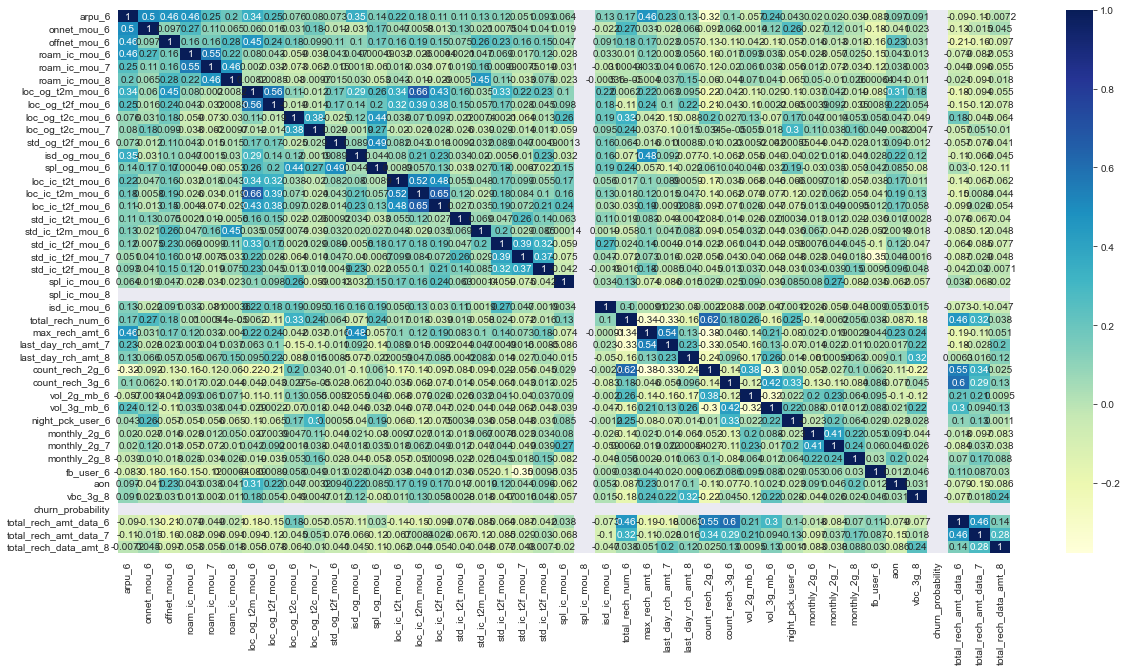

In [2801]:
plt.figure(figsize=(20,10))
corr_data_churned_Only = df_ChurnedOnly.corr()
sns.heatmap(data=corr_data_churned_Only,annot=True,cmap="YlGnBu")
plt.show()

In [2802]:
df_ChurnedOnly.head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  \
217   331.819        17.48         20.53           0.00           0.00   
1209  304.217        86.59         77.24           0.00           0.00   
1291  238.215         0.33         11.21           0.00           0.00   
1399   95.363         0.00          0.00           0.00           0.00   
1442  471.959        77.69        223.71           9.24           9.34   

      roam_ic_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
217            0.00             17.16              0.00              0.00   
1209           5.09             24.74              2.19              1.91   
1291           0.00              1.48              0.00              1.78   
1399           0.00              0.00              0.00              0.00   
1442           0.00             42.71              0.00              0.00   

      loc_og_t2c_mou_7  ...  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
217                0.0  ...             0             0             0   
1209               0.0  ...             1             1             2   
1291               0.0  ...             0             0             0   
1399               0.0  ...             0             0             0   
1442               0.0  ...             0             0             0   

      fb_user_6   aon  vbc_3g_8  churn_probability  total_rech_amt_data_6  \
217         1.0   222      0.00                  1                 1584.0   
1209        1.0  3325     24.08                  1                  154.0   
1291        1.0   413      0.00                  1                 3000.0   
1399        1.0   201    298.67                  1                  224.0   
1442        1.0   432      0.00                  1                 2500.0   

      total_rech_amt_data_7  total_rech_data_amt_8  
217                   504.0                    0.0  
1209                  900.0                  792.0  
1291                  900.0                    0.0  
1399                 2607.0                 1953.0  
1442                  625.0                    0.0  

[5 rows x 43 columns]

<AxesSubplot:ylabel='Frequency'>

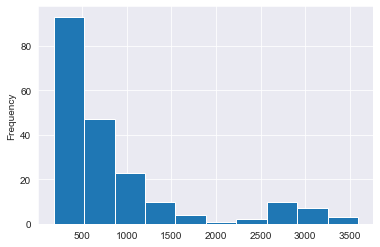

In [2803]:
df_ChurnedOnly["aon"].plot(kind="hist")

------------ arpu_6 ------------------


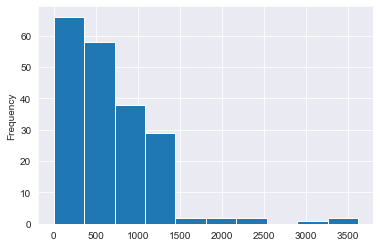

------------ onnet_mou_6 ------------------


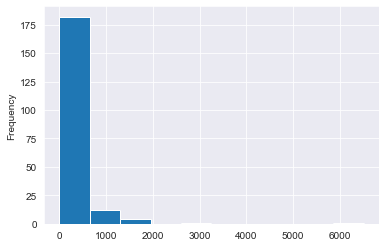

------------ offnet_mou_6 ------------------


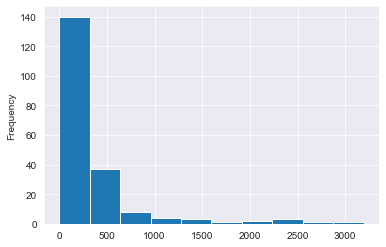

------------ roam_ic_mou_6 ------------------


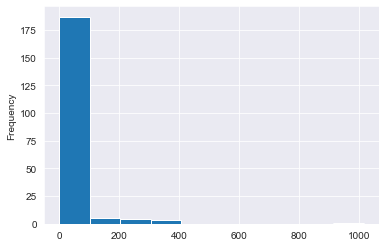

------------ roam_ic_mou_7 ------------------


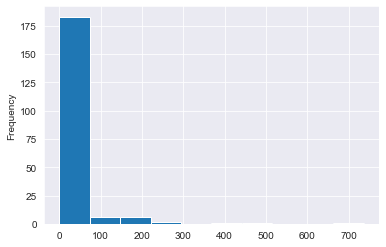

------------ roam_ic_mou_8 ------------------


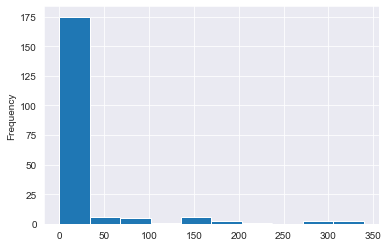

------------ loc_og_t2m_mou_6 ------------------


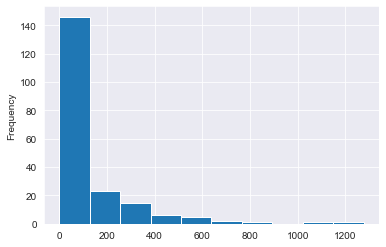

------------ loc_og_t2f_mou_6 ------------------


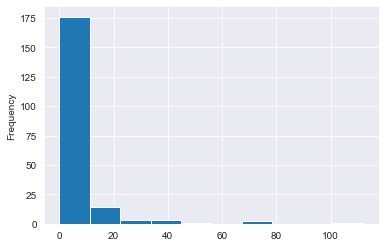

------------ loc_og_t2c_mou_6 ------------------


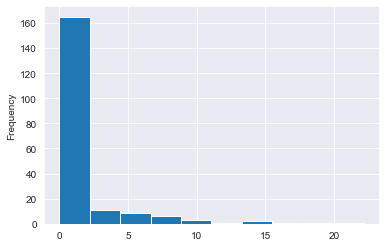

------------ loc_og_t2c_mou_7 ------------------


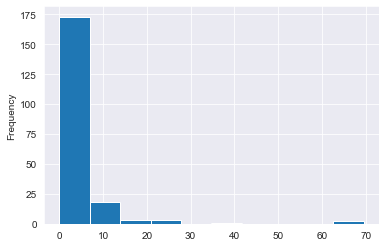

------------ std_og_t2f_mou_6 ------------------


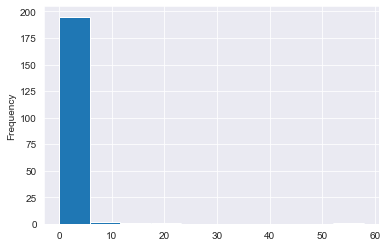

------------ isd_og_mou_6 ------------------


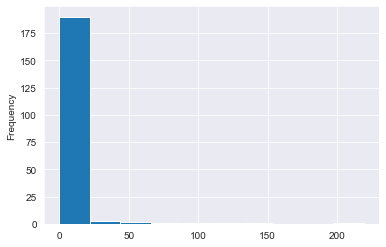

------------ spl_og_mou_6 ------------------


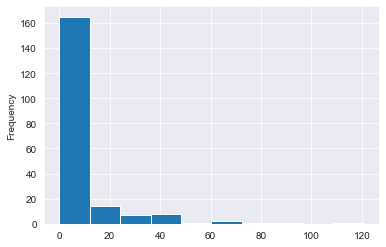

------------ loc_ic_t2t_mou_6 ------------------


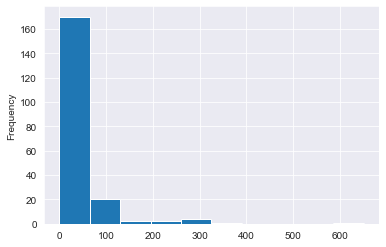

------------ loc_ic_t2m_mou_6 ------------------


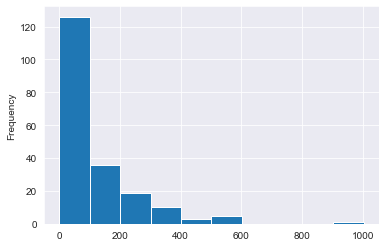

------------ loc_ic_t2f_mou_6 ------------------


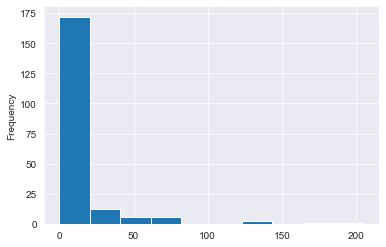

------------ std_ic_t2t_mou_6 ------------------


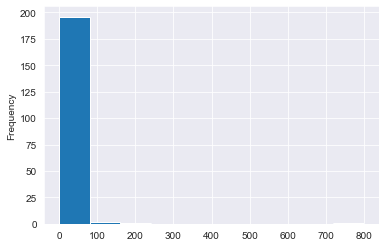

------------ std_ic_t2m_mou_6 ------------------


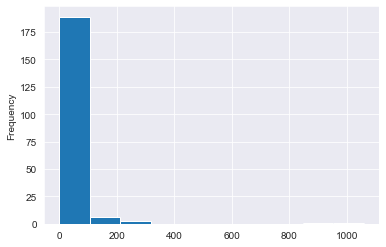

------------ std_ic_t2f_mou_6 ------------------


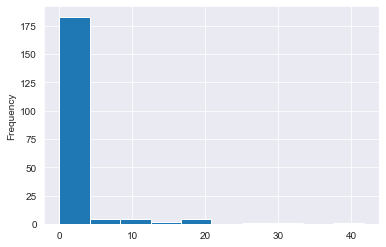

------------ std_ic_t2f_mou_7 ------------------


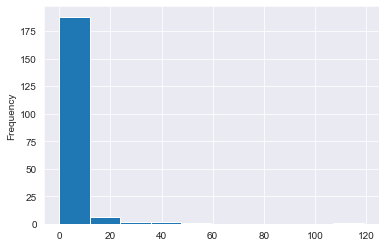

------------ std_ic_t2f_mou_8 ------------------


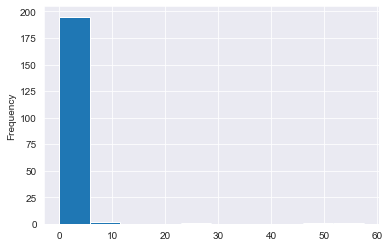

------------ spl_ic_mou_6 ------------------


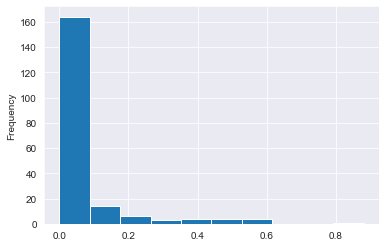

------------ spl_ic_mou_8 ------------------


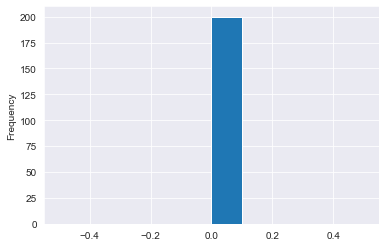

------------ isd_ic_mou_6 ------------------


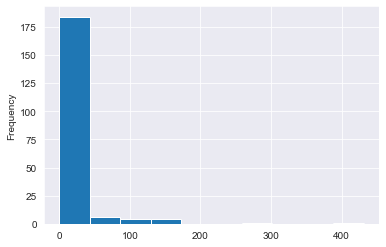

------------ total_rech_num_6 ------------------


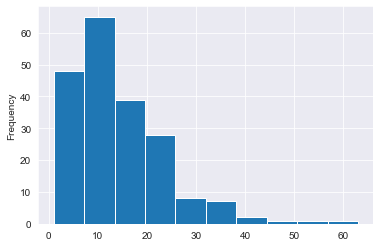

------------ max_rech_amt_6 ------------------


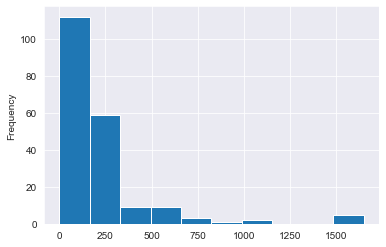

------------ last_day_rch_amt_7 ------------------


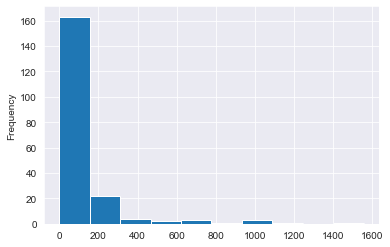

------------ last_day_rch_amt_8 ------------------


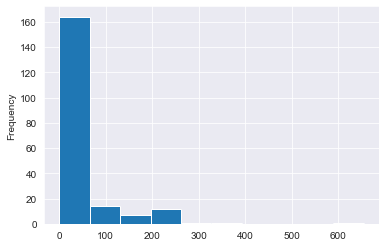

------------ count_rech_2g_6 ------------------


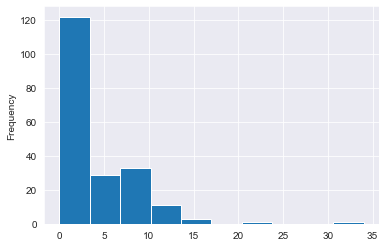

------------ count_rech_3g_6 ------------------


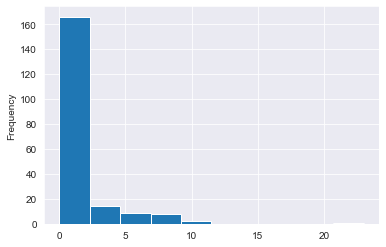

------------ vol_2g_mb_6 ------------------


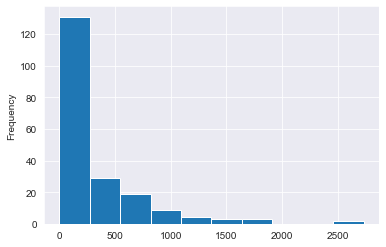

------------ vol_3g_mb_6 ------------------


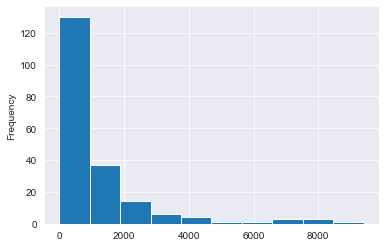

------------ night_pck_user_6 ------------------


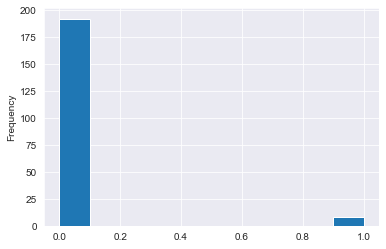

------------ monthly_2g_6 ------------------


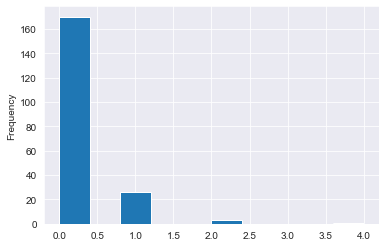

------------ monthly_2g_7 ------------------


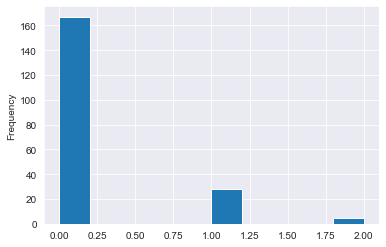

------------ monthly_2g_8 ------------------


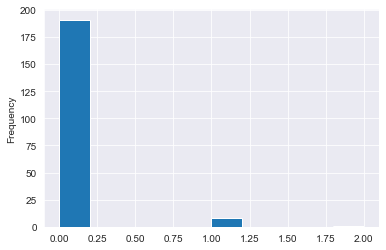

------------ fb_user_6 ------------------


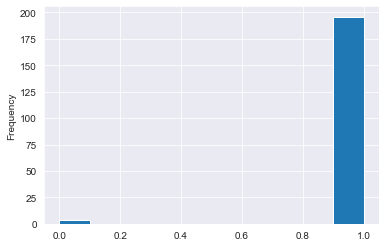

------------ aon ------------------


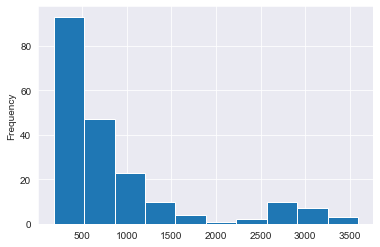

------------ vbc_3g_8 ------------------


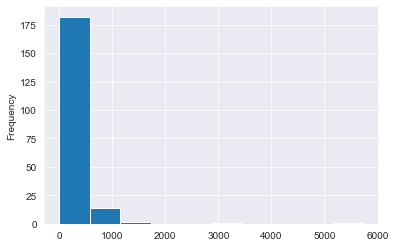

------------ churn_probability ------------------


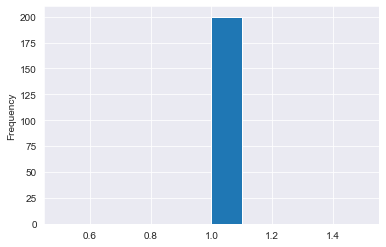

------------ total_rech_amt_data_6 ------------------


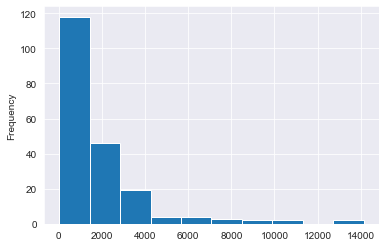

------------ total_rech_amt_data_7 ------------------


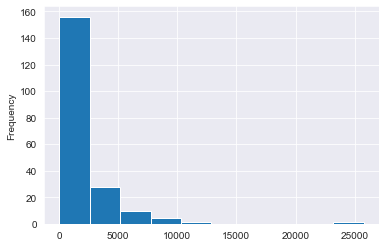

------------ total_rech_data_amt_8 ------------------


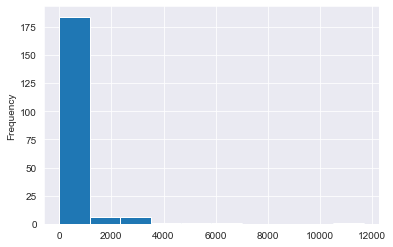

In [2804]:
for col in df_ChurnedOnly.columns:
    print("------------", col ,"------------------")
    df_ChurnedOnly[col].plot(kind="hist")
    plt.show()

In [2805]:
June_Cols=df_ChurnedOnly.columns[df_ChurnedOnly.columns.str.contains('_6')]
June_Cols

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'total_rech_num_6', 'max_rech_amt_6', 'count_rech_2g_6',
       'count_rech_3g_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'night_pck_user_6',
       'monthly_2g_6', 'fb_user_6', 'total_rech_amt_data_6'],
      dtype='object')

<AxesSubplot:xlabel='total_rech_num_6', ylabel='Count'>

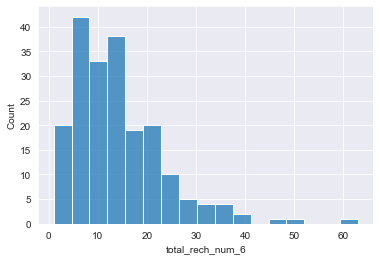

In [2806]:
sns.histplot(df_ChurnedOnly["total_rech_num_6"])

In [2807]:
June_mou_Cols=df_ChurnedOnly.columns[df_ChurnedOnly.columns.str.contains('mou_6')]
June_mou_Cols

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2f_mou_6',
       'isd_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

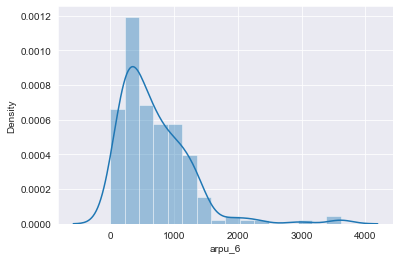

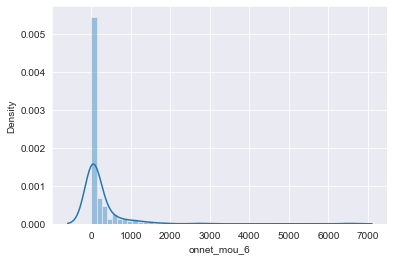

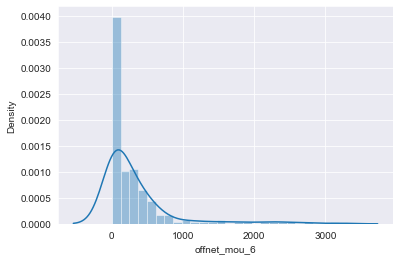

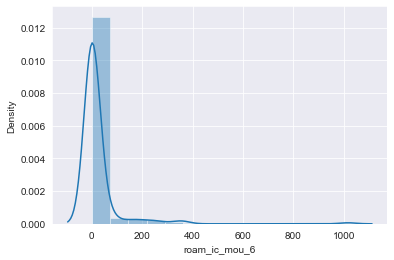

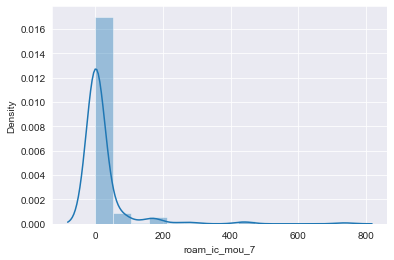

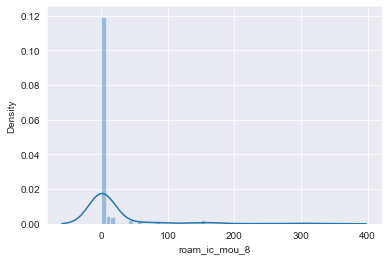

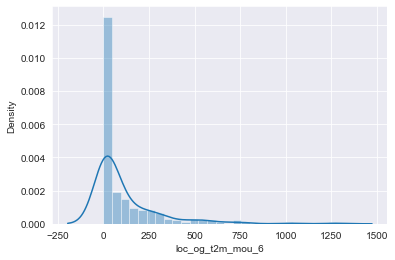

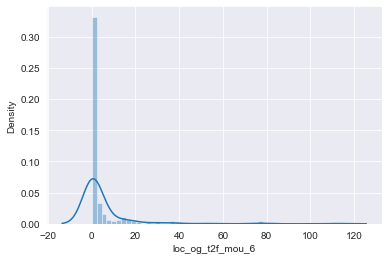

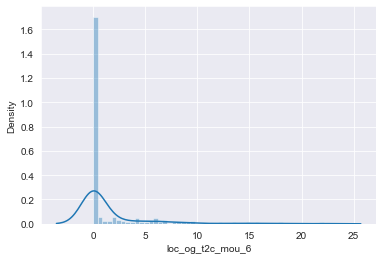

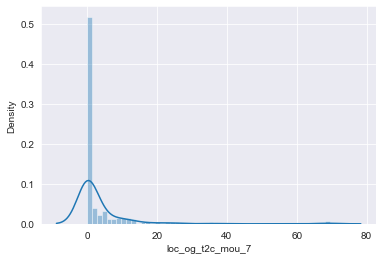

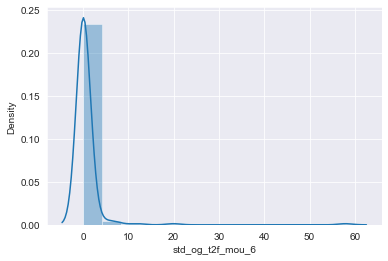

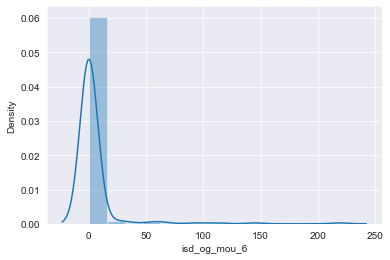

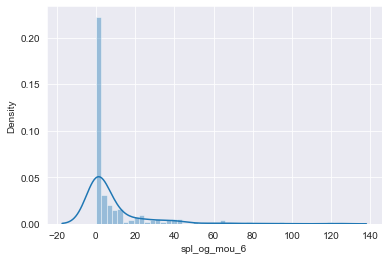

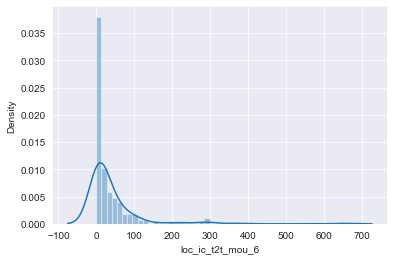

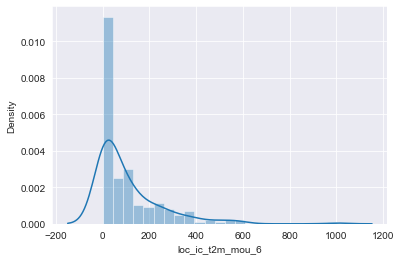

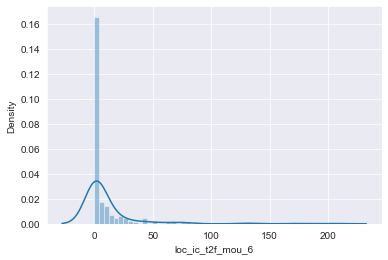

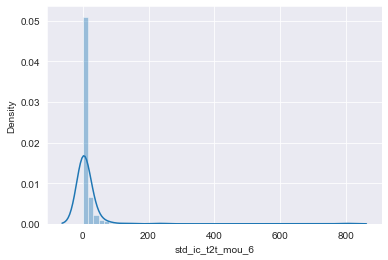

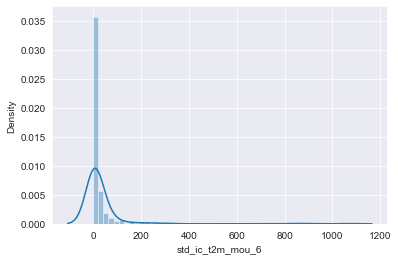

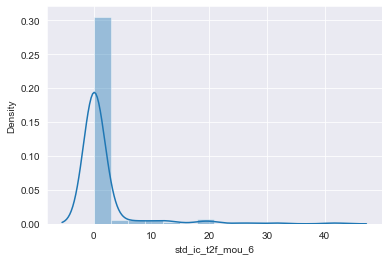

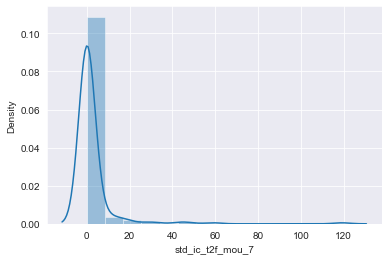

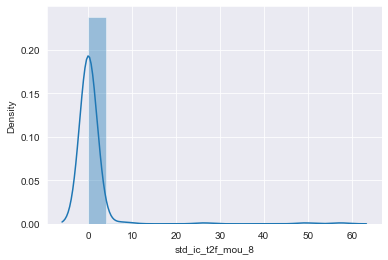

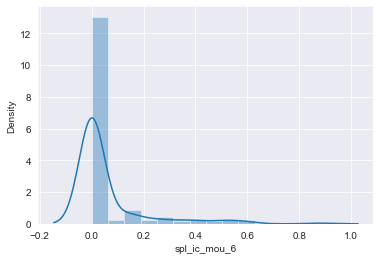

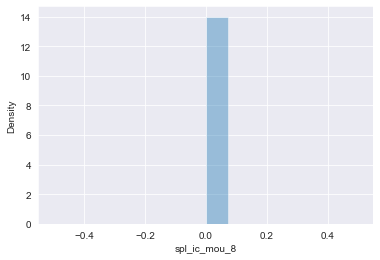

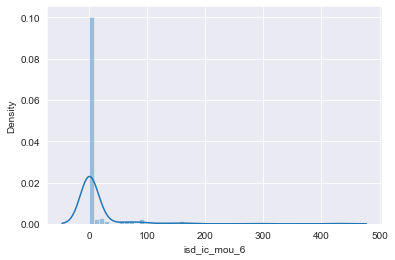

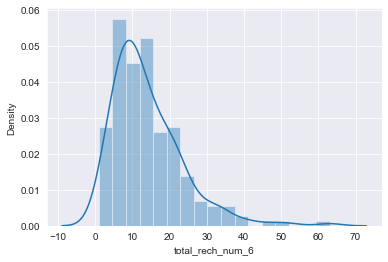

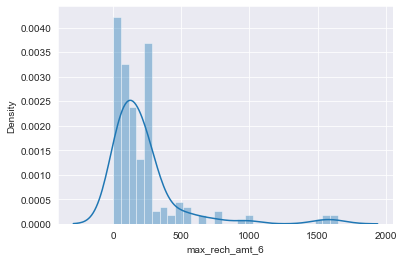

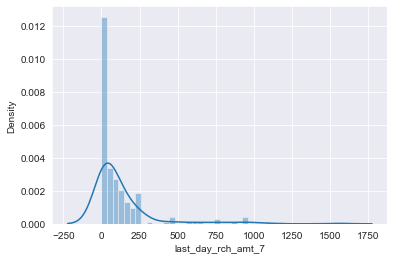

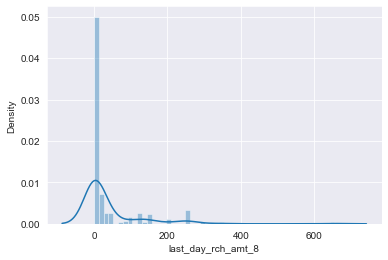

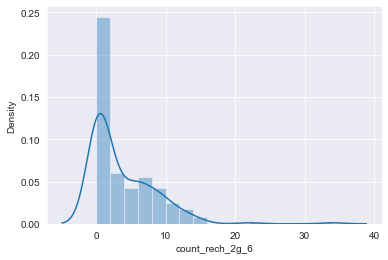

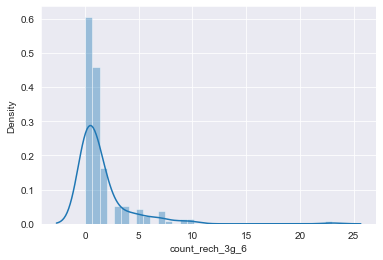

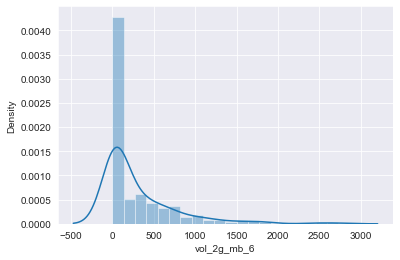

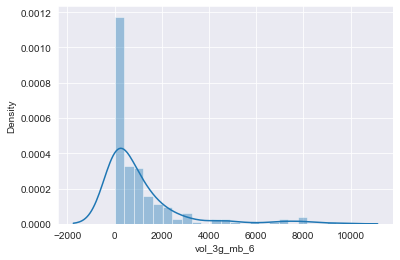

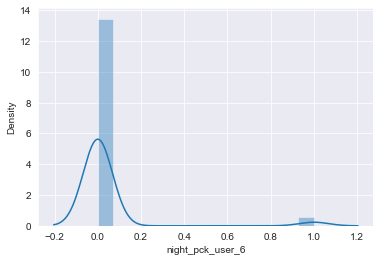

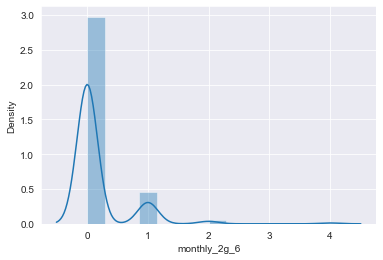

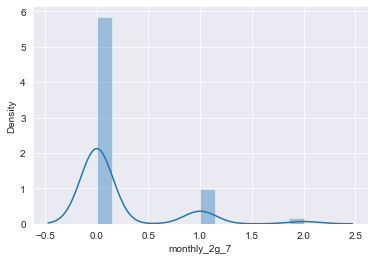

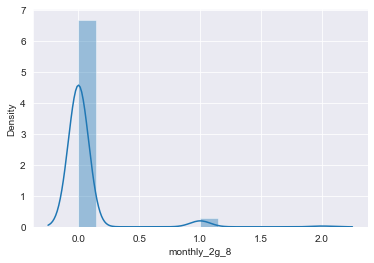

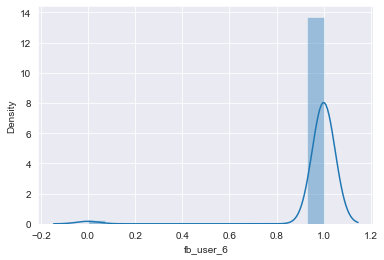

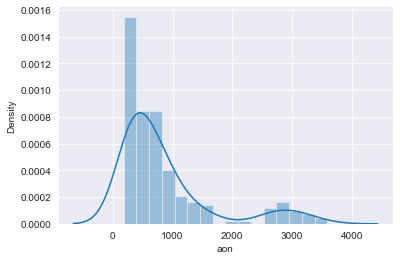

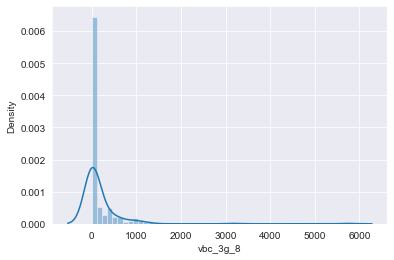

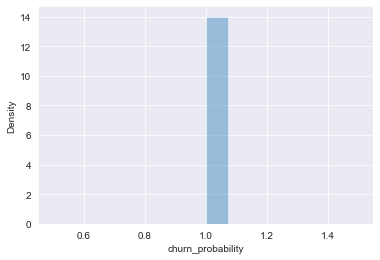

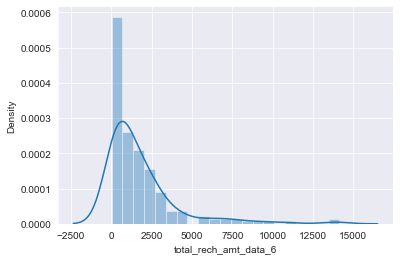

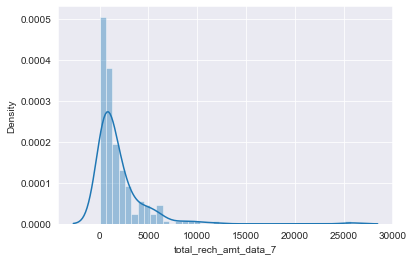

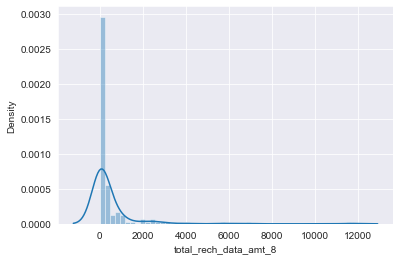

In [2808]:
for col in df_ChurnedOnly.columns:
    sns.distplot(df_ChurnedOnly[col])
    plt.show()

### Pre- req for Model Building

In [2809]:
# lets create X & y dataset for model building, 
# X will not have "churn_probability" and y will only have "churn_probability"

y= train_df['churn_probability']
X = train_df.drop(['churn_probability'], axis=1)

In [2810]:
X.head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  \
4    240.708        21.28         56.99          53.64           0.00   
27   390.489         8.58        133.16           0.00           0.00   
45  1361.775       872.16        410.56           8.83         149.04   
53   687.930       104.84        149.78           0.00           0.00   
63   241.317         7.91         11.48           0.00           0.00   

    roam_ic_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
4             0.0             36.74             11.99              0.00   
27            0.0             96.91             33.71              0.00   
45            0.0            167.34              0.00              2.44   
53            0.0            149.78              0.00              0.00   
63            0.0             11.48              0.00              0.00   

    loc_og_t2c_mou_7  ...  night_pck_user_6  monthly_2g_6  monthly_2g_7  \
4               9.85  ...               0.0             0             0   
27              0.00  ...               0.0             1             0   
45              0.25  ...               0.0             0             0   
53              0.00  ...               0.0             2             2   
63              0.00  ...               0.0             0             0   

    monthly_2g_8  fb_user_6   aon  vbc_3g_8  total_rech_amt_data_6  \
4              0        1.0   647      0.00                 1225.0   
27             0        1.0   573    700.40                  820.0   
45             0        1.0   942    132.74                  369.0   
53             1        1.0  1194    425.33                  792.0   
63             0        1.0   317    214.17                 1372.0   

    total_rech_amt_data_7  total_rech_data_amt_8  
4                  1337.0                  852.0  
27                  608.0                  642.0  
45                 1050.0                   41.0  
53                  792.0                  198.0  
63                  900.0                  625.0  

[5 rows x 42 columns]

In [2811]:
y.head()

4     0
27    0
45    0
53    0
63    0
Name: churn_probability, dtype: int64

In [2812]:
y.unique()

array([0, 1], dtype=int64)

In [2813]:
#split the dateset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2726, 42)
X_test shape: (1169, 42)


## Scale the dataset

In [2814]:
#Scaling to be done only for numeric columns

In [2815]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2726 entries, 41176 to 19128
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   arpu_6                 2726 non-null   float64
 1   onnet_mou_6            2726 non-null   float64
 2   offnet_mou_6           2726 non-null   float64
 3   roam_ic_mou_6          2726 non-null   float64
 4   roam_ic_mou_7          2726 non-null   float64
 5   roam_ic_mou_8          2726 non-null   float64
 6   loc_og_t2m_mou_6       2726 non-null   float64
 7   loc_og_t2f_mou_6       2726 non-null   float64
 8   loc_og_t2c_mou_6       2726 non-null   float64
 9   loc_og_t2c_mou_7       2726 non-null   float64
 10  std_og_t2f_mou_6       2726 non-null   float64
 11  isd_og_mou_6           2726 non-null   float64
 12  spl_og_mou_6           2726 non-null   float64
 13  loc_ic_t2t_mou_6       2726 non-null   float64
 14  loc_ic_t2m_mou_6       2726 non-null   float64
 15 

#### All columns are numeric for scaling

In [2816]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2817]:
cols=X_train.columns

In [2818]:
cols

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'count_rech_2g_6', 'count_rech_3g_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'night_pck_user_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'fb_user_6', 'aon', 'vbc_3g_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_data_amt_8'],
      dtype='object')

In [2819]:

# fit_transform on train data
X_train[cols]= scaler.fit_transform(X_train[cols])
# only transform on test data
X_test[cols]=scaler.transform(X_test[cols])

In [2820]:
X_train.head(5)

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  \
41176 -0.255217     0.008109     -0.317370      -0.223604      -0.176952   
42255 -1.022130    -0.437272     -0.650464      -0.223604      -0.176952   
55711 -0.862956    -0.421100     -0.482578      -0.223604      -0.176952   
59390  0.808196     3.266016     -0.449033       2.074187      -0.011948   
42350  0.516727    -0.022108      0.399570      -0.152133      -0.176952   

       roam_ic_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
41176       -0.19227         -0.154419          1.333223          0.646733   
42255       -0.19227         -0.637137         -0.357076         -0.303207   
55711       -0.19227         -0.330412         -0.357076         -0.303207   
59390       -0.19227         -0.532946         -0.348327         -0.303207   
42350       -0.19227          0.378115          0.108369          2.716750   

       loc_og_t2c_mou_7  ...  night_pck_user_6  monthly_2g_6  monthly_2g_7  \
41176         -0.230114  ...         -0.181568     -0.417992     -0.461169   
42255         -0.230114  ...         -0.181568     -0.417992     -0.461169   
55711         -0.230114  ...         -0.181568     -0.417992     -0.461169   
59390         -0.230114  ...         -0.181568     -0.417992     -0.461169   
42350          0.291304  ...         -0.181568      1.553368      1.429278   

       monthly_2g_8  fb_user_6       aon  vbc_3g_8  total_rech_amt_data_6  \
41176     -0.406878   0.147442  0.892083  0.441186              -0.403651   
42255     -0.406878   0.147442 -0.712436 -0.128664               0.021755   
55711     -0.406878   0.147442  0.126441 -0.611768               0.073935   
59390     -0.406878   0.147442  2.097137 -0.611768              -0.595700   
42350      1.746811   0.147442  2.297979 -0.611768              -0.329730   

       total_rech_amt_data_7  total_rech_data_amt_8  
41176               0.217324               0.294894  
42255              -0.265735               0.163030  
55711              -0.265735              -0.461297  
59390               0.095456              -0.493048  
42350              -0.629302              -0.443154  

[5 rows x 42 columns]

In [2821]:
X_test.head(5)

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  \
25375 -0.107674    -0.432353     -0.529598       0.019049      -0.176952   
60375 -0.436963    -0.346877     -0.544083      -0.223604      -0.176952   
32185  1.694078    -0.365304      0.802968      -0.223604      -0.176952   
25050  0.953593    -0.148713      0.549324       0.150158      -0.124732   
13222  0.409518    -0.245422      1.039200      -0.223604      -0.176952   

       roam_ic_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
25375       -0.19227         -0.460916         -0.357076          0.242654   
60375       -0.19227         -0.533705         -0.357076          2.229374   
32185       -0.19227          1.950127          1.042174         -0.303207   
25050       -0.19227          1.056076          0.035461         -0.303207   
13222       -0.19227          2.017030          0.394168         -0.303207   

       loc_og_t2c_mou_7  ...  night_pck_user_6  monthly_2g_6  monthly_2g_7  \
25375         -0.230114  ...         -0.181568     -0.417992     -0.461169   
60375          0.361889  ...          5.507571     -0.417992     -0.461169   
32185         -0.230114  ...         -0.181568     -0.417992     -0.461169   
25050          0.027180  ...         -0.181568     -0.417992     -0.461169   
13222         -0.230114  ...         -0.181568     -0.417992     -0.461169   

       monthly_2g_8  fb_user_6       aon  vbc_3g_8  total_rech_amt_data_6  \
25375     -0.406878   0.147442 -0.865564 -0.248668               0.111620   
60375     -0.406878   0.147442  0.478193 -0.611768               0.187715   
32185     -0.406878   0.147442  2.704102  5.074428               0.035525   
25050     -0.406878   0.147442  0.677925 -0.611768              -0.459092   
13222     -0.406878   0.147442 -0.998720  0.624233              -0.588453   

       total_rech_amt_data_7  total_rech_data_amt_8  
25375              -0.548509              -0.178130  
60375              -0.613347              -0.461945  
32185               0.501796               0.096612  
25050              -0.527123              -0.345633  
13222              -0.587208               0.052874  

[5 rows x 42 columns]

In [2822]:
# summary statistics of standardized variables (after scaling)
X_train.describe()

arpu_6   onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  \
count  2.726000e+03  2.726000e+03  2.726000e+03   2.726000e+03   2.726000e+03   
mean   6.361586e-17 -3.193011e-17 -1.081714e-16   2.857419e-16   1.598542e-17   
std    1.000183e+00  1.000183e+00  1.000183e+00   1.000183e+00   1.000183e+00   
min   -1.304612e+00 -4.372715e-01 -6.504645e-01  -2.236038e-01  -1.769520e-01   
25%   -7.316186e-01 -4.227588e-01 -5.765504e-01  -2.236038e-01  -1.769520e-01   
50%   -2.301166e-01 -3.428821e-01 -3.481426e-01  -2.236038e-01  -1.769520e-01   
75%    4.681468e-01 -5.075808e-02  1.633784e-01  -2.236038e-01  -1.769520e-01   
max    8.569308e+00  1.353181e+01  1.318105e+01   1.580335e+01   2.270394e+01   

       roam_ic_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
count   2.726000e+03      2.726000e+03      2.726000e+03      2.726000e+03   
mean   -1.200434e-16      2.468067e-17     -2.325929e-16      1.958494e-16   
std     1.000183e+00      1.000183e+00      1.000183e+00      1.000183e+00   
min    -1.922699e-01     -6.371366e-01     -3.570758e-01     -3.032066e-01   
25%    -1.922699e-01     -5.767353e-01     -3.570758e-01     -3.032066e-01   
50%    -1.922699e-01     -3.744956e-01     -3.436607e-01     -3.032066e-01   
75%    -1.922699e-01      1.878552e-01     -9.139911e-02     -2.775086e-01   
max     2.700394e+01      1.296712e+01      1.865383e+01      1.456441e+01   

       loc_og_t2c_mou_7  ...  night_pck_user_6  monthly_2g_6  monthly_2g_7  \
count      2.726000e+03  ...      2.726000e+03  2.726000e+03  2.726000e+03   
mean       4.162624e-16  ...     -1.995021e-16  2.742569e-16  4.222187e-16   
std        1.000183e+00  ...      1.000183e+00  1.000183e+00  1.000183e+00   
min       -2.301139e-01  ...     -1.815683e-01 -4.179920e-01 -4.611694e-01   
25%       -2.301139e-01  ...     -1.815683e-01 -4.179920e-01 -4.611694e-01   
50%       -2.301139e-01  ...     -1.815683e-01 -4.179920e-01 -4.611694e-01   
75%       -2.019368e-01  ...     -1.815683e-01 -4.179920e-01 -4.611694e-01   
max        3.784362e+01  ...      5.507571e+00  7.467449e+00  5.210174e+00   

       monthly_2g_8     fb_user_6           aon      vbc_3g_8  \
count  2.726000e+03  2.726000e+03  2.726000e+03  2.726000e+03   
mean   1.177016e-17  3.974973e-17  7.282020e-17 -4.618463e-17   
std    1.000183e+00  1.000183e+00  1.000183e+00  1.000183e+00   
min   -4.068782e-01 -6.782330e+00 -1.047543e+00 -6.117679e-01   
25%   -4.068782e-01  1.474420e-01 -7.579307e-01 -6.117679e-01   
50%   -4.068782e-01  1.474420e-01 -3.751097e-01 -4.215310e-01   
75%   -4.068782e-01  1.474420e-01  4.501746e-01  2.313297e-01   
max    1.036157e+01  1.474420e-01  3.547418e+00  9.965253e+00   

       total_rech_amt_data_6  total_rech_amt_data_7  total_rech_data_amt_8  
count           2.726000e+03           2.726000e+03           2.726000e+03  
mean            1.241365e-16          -4.255991e-17           6.064278e-17  
std             1.000183e+00           1.000183e+00           1.000183e+00  
min            -6.188908e-01          -6.758086e-01          -4.930480e-01  
25%            -4.886236e-01          -4.851990e-01          -4.350539e-01  
50%            -2.587085e-01          -2.657348e-01          -2.947666e-01  
75%             1.341765e-01           1.439995e-01           7.814505e-02  
max             1.941290e+01           1.801616e+01           1.538891e+01  

[8 rows x 42 columns]

In [2823]:
X_train.columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'count_rech_2g_6', 'count_rech_3g_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'night_pck_user_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'fb_user_6', 'aon', 'vbc_3g_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_data_amt_8'],
      dtype='object')

# Modelling

## Model 1 : Interpretable Model : Logistic Regression

Let us create Baseline Logistic Regression Model

In [2824]:
from sklearn.linear_model import LogisticRegression
baseline_model = LogisticRegression(random_state=100, class_weight='balanced')
baseline_model = baseline_model.fit(X_train, y_train)

In [2825]:
y_train_pred = baseline_model.predict_proba(X_train)[:,1]

In [2826]:
y_train_pred

array([0.0911433 , 0.32297276, 0.48443392, ..., 0.43559196, 0.51242481,
       0.05552924])

In [2827]:
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [2828]:
y_test_pred

array([2.81151985e-01, 2.87214661e-04, 2.67272544e-02, ...,
       1.68929785e-05, 2.62829863e-03, 5.43511015e-03])

In [2829]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

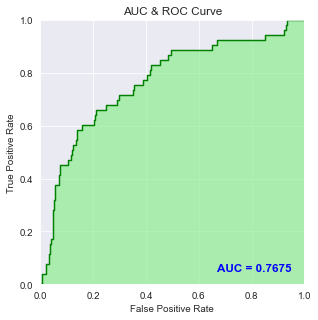

In [2830]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(5, 5), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Performance metrics explains how good a model is. 
### Metrics like accuracy, precision, recall, auc-roc (Area Under Curve Receiver Operator Characteristic) etc are used

Baseline Performance

In [2831]:
column_names =  ['Model','Accuracy', 'Sensitivity/TruePositiveRate/Recall', 'Specificity/TrueNegativeRate','Precision/PositivePredictiveValue', 'F1-score','ROC_AUC_Score']
Stats_df  = pd.DataFrame(columns = column_names)
Stats_df

Empty DataFrame
Columns: [Model, Accuracy, Sensitivity/TruePositiveRate/Recall, Specificity/TrueNegativeRate, Precision/PositivePredictiveValue, F1-score, ROC_AUC_Score]
Index: []

In [2832]:
# Creation of function to save Performance Metrics in dataframe
import math
def Save_model_metrics(matrix , modelName, Stats_df , ROC_AUC_Score ) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    precision = round(TP/float(TP + FP),3)
    f1score = round(2*precision*sensitivity/(precision + sensitivity),3)
    Stats_df = Stats_df[Stats_df.Model != modelName]
    Stats_df = Stats_df.append({'Model' : modelName, 
                                'Accuracy' : accuracy, 
                                'Sensitivity/TruePositiveRate/Recall' : sensitivity, 
                                'Specificity/TrueNegativeRate' : specificity,
                                'Precision/PositivePredictiveValue' : precision,
                                'F1-score' : f1score,
                                'ROC_AUC_Score' : ROC_AUC_Score
                               }, 
                               ignore_index = True)
    return(Stats_df)

In [2833]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [2834]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
ROC_AUC_Score_train = round(roc_auc_score(y_train, y_train_pred),3)
ROC_AUC_Score_test = round(roc_auc_score(y_test, y_test_pred),3)

In [2835]:
ROC_AUC_Score_train

0.881

In [2836]:
ROC_AUC_Score_test

0.768

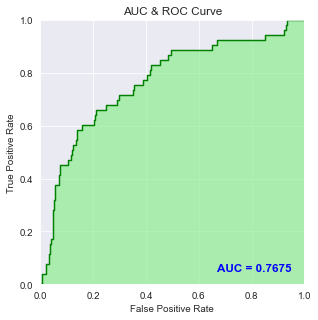

In [2837]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(5, 5), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [2838]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[1954  625]
 [  19  128]]

Confusion Matrix for test: 
 [[849 267]
 [ 18  35]]


In [2839]:
# Baseline Model Performance : 
Stats_df = Save_model_metrics(train_matrix, ' Train Baseline Model', Stats_df, ROC_AUC_Score_train)
Stats_df = Save_model_metrics(test_matrix, 'Test Baseline Model', Stats_df, ROC_AUC_Score_test)

In [2840]:
Stats_df

Model  Accuracy  Sensitivity/TruePositiveRate/Recall  \
0   Train Baseline Model     0.764                                0.871   
1    Test Baseline Model     0.756                                0.660   

   Specificity/TrueNegativeRate  Precision/PositivePredictiveValue  F1-score  \
0                         0.758                              0.170     0.284   
1                         0.761                              0.116     0.197   

   ROC_AUC_Score  
0          0.881  
1          0.768

#### Baseline Performance - Finding Optimum Probability Cutoff

In [2841]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
41176    1    0    0    0    0    0    0    0    0    0
42255    1    1    1    1    0    0    0    0    0    0
55711    1    1    1    1    1    0    0    0    0    0
59390    1    1    0    0    0    0    0    0    0    0
42350    1    0    0    0    0    0    0    0    0    0

In [2842]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.054
0.1        0.980        0.362     0.395
0.2        0.966        0.489     0.515
0.3        0.952        0.584     0.604
0.4        0.898        0.679     0.690
0.5        0.871        0.758     0.764
0.6        0.823        0.833     0.833
0.7        0.612        0.896     0.881
0.8        0.354        0.950     0.917
0.9        0.143        0.979     0.934

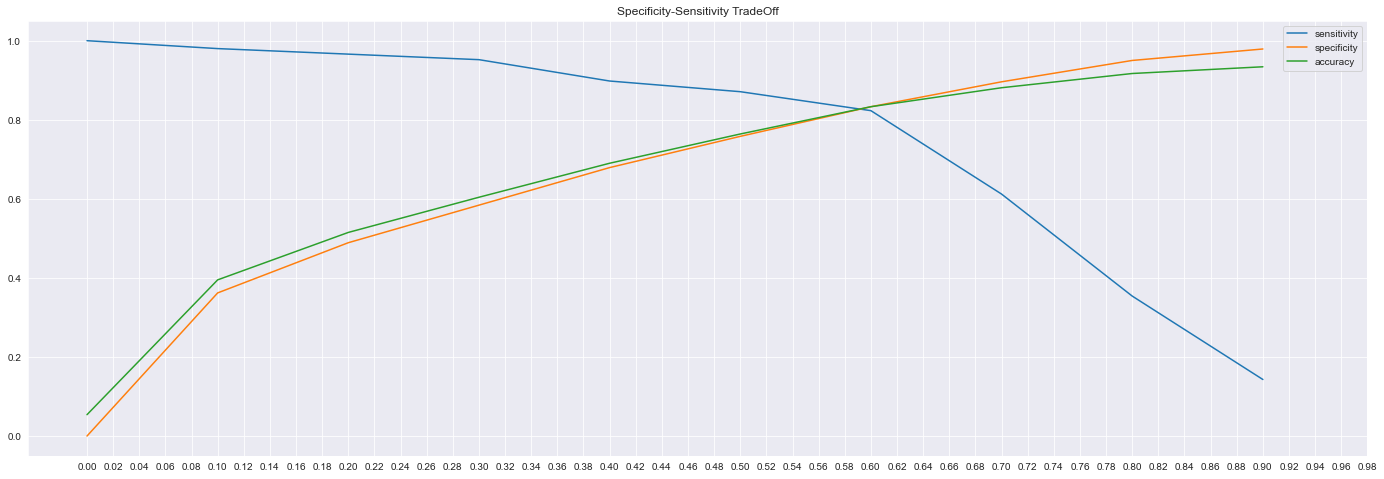

In [2843]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

Baseline Performance at Optimum Cutoff

In [2844]:
optimum_cutoff = 0.59
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[2132  447]
 [  24  123]]

Confusion Matrix for test: 
 [[918 198]
 [ 21  32]]


In [2845]:
ROC_AUC_Score_train = round(roc_auc_score(y_train, y_train_pred_final),3)
ROC_AUC_Score_test = round(roc_auc_score(y_test, y_test_pred_final),3)

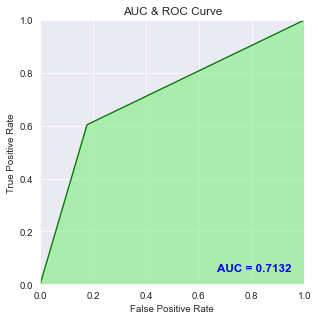

In [2846]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred_final)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred_final)

plt.figure(figsize=(5, 5), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [2847]:
Stats_df = Save_model_metrics(train_matrix, ' Train Baseline Model at Optimum Cutoff', Stats_df,ROC_AUC_Score_train)
Stats_df = Save_model_metrics(test_matrix, 'Test Baseline Model at Optimum Cutoff', Stats_df,ROC_AUC_Score_test)

In [2848]:
Stats_df

Model  Accuracy  \
0                     Train Baseline Model     0.764   
1                      Test Baseline Model     0.756   
2   Train Baseline Model at Optimum Cutoff     0.827   
3    Test Baseline Model at Optimum Cutoff     0.813   

   Sensitivity/TruePositiveRate/Recall  Specificity/TrueNegativeRate  \
0                                0.871                         0.758   
1                                0.660                         0.761   
2                                0.837                         0.827   
3                                0.604                         0.823   

   Precision/PositivePredictiveValue  F1-score  ROC_AUC_Score  
0                              0.170     0.284          0.881  
1                              0.116     0.197          0.768  
2                              0.216     0.343          0.832  
3                              0.139     0.226          0.713

### Feature Selection using RFE

In [2849]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, 15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True])

In [2850]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

Column  Rank  Support
20       std_ic_t2f_mou_8     1     True
37                    aon     1     True
35           monthly_2g_8     1     True
31            vol_3g_mb_6     1     True
29        count_rech_3g_6     1     True
28        count_rech_2g_6     1     True
27     last_day_rch_amt_8     1     True
26     last_day_rch_amt_7     1     True
25         max_rech_amt_6     1     True
22           spl_ic_mou_8     1     True
40  total_rech_amt_data_7     1     True
13       loc_ic_t2t_mou_6     1     True
41  total_rech_data_amt_8     1     True
3           roam_ic_mou_6     1     True
8        loc_og_t2c_mou_6     1     True
11           isd_og_mou_6     2    False
21           spl_ic_mou_6     3    False
32       night_pck_user_6     4    False
33           monthly_2g_6     5    False
5           roam_ic_mou_8     6    False
12           spl_og_mou_6     7    False
10       std_og_t2f_mou_6     8    False
19       std_ic_t2f_mou_7     9    False
14       loc_ic_t2m_mou_6    10    False
7        loc_og_t2f_mou_6    11    False
30            vol_2g_mb_6    12    False
1             onnet_mou_6    13    False
0                  arpu_6    14    False
2            offnet_mou_6    15    False
18       std_ic_t2f_mou_6    16    False
9        loc_og_t2c_mou_7    17    False
17       std_ic_t2m_mou_6    18    False
16       std_ic_t2t_mou_6    19    False
4           roam_ic_mou_7    20    False
39  total_rech_amt_data_6    21    False
24       total_rech_num_6    22    False
6        loc_og_t2m_mou_6    23    False
23           isd_ic_mou_6    24    False
36              fb_user_6    25    False
34           monthly_2g_7    26    False
38               vbc_3g_8    27    False
15       loc_ic_t2f_mou_6    28    False

In [2851]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['std_ic_t2f_mou_8',
 'aon',
 'monthly_2g_8',
 'vol_3g_mb_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'max_rech_amt_6',
 'spl_ic_mou_8',
 'total_rech_amt_data_7',
 'loc_ic_t2t_mou_6',
 'total_rech_data_amt_8',
 'roam_ic_mou_6',
 'loc_og_t2c_mou_6']

### Logistic Regression with RFE Selected Columns

#### Model 1

In [2852]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

logr = sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                 2726
Model:                            GLM   Df Residuals:                     2710
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 19 Oct 2022   Deviance:                       866.50
Time:                        22:07:50   Pearson chi2:                 3.86e+03
No. Iterations:                    29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -52.7466   3.13e+04     -0.002      0.999   -6.14e+04    6.13e+04
std_ic_t2f_mou_8         -1.6919      0.709     -2.387      0.017      -3.081      -0.303
aon                      -0.3045      0.114     -2.674      0.007      -0.528      -0.081
monthly_2g_8             -0.8042      0.238     -3.378      0.001      -1.271      -0.338
vol_3g_mb_6               0.0736      0.123      0.601      0.548      -0.167       0.314
count_rech_3g_6           0.2017      0.104      1.934      0.053      -0.003       0.406
count_rech_2g_6           0.2409      0.108      2.228      0.026       0.029       0.453
last_day_rch_amt_8       -1.0981      0.197     -5.565      0.000      -1.485      -0.711
last_day_rch_amt_7        0.1281      0.083      1.537      0.124      -0.035       0.291
max_rech_amt_6            0.3831      0.096      3.978      0.000       0.194       0.572
spl_ic_mou_8           -185.4181    1.2e+05     -0.002      0.999   -2.35e+05    2.35e+05
total_rech_amt_data_7     0.1934      0.106      1.825      0.068      -0.014       0.401
loc_ic_t2t_mou_6         -0.3773      0.206     -1.831      0.067      -0.781       0.027
total_rech_data_amt_8    -3.0127      0.460     -6.551      0.000      -3.914      -2.111
roam_ic_mou_6             0.2106      0.075      2.808      0.005       0.064       0.358
loc_og_t2c_mou_6         -0.2375      0.156     -1.521      0.128      -0.543       0.068
=========================================================================================
"""

#### Logistic Regression with Manual Feature Elimination

In [2853]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train, logr_fit, rfe_selected_columns)

VIF  P-value
Features                            
max_rech_amt_6         1.78   0.0001
vol_3g_mb_6            1.56   0.5481
total_rech_data_amt_8  1.56   0.0000
total_rech_amt_data_7  1.55   0.0680
count_rech_2g_6        1.47   0.0259
count_rech_3g_6        1.46   0.0531
last_day_rch_amt_7     1.41   0.1243
last_day_rch_amt_8     1.39   0.0000
aon                    1.08   0.0075
spl_ic_mou_8           1.03   0.9988
monthly_2g_8           1.03   0.0007
loc_ic_t2t_mou_6       1.02   0.0672
roam_ic_mou_6          1.02   0.0050
loc_og_t2c_mou_6       1.01   0.1282
std_ic_t2f_mou_8       1.01   0.0170

spl_ic_mou_8 has very high p-value. lets drop and recheck again

In [2854]:
selected_columns = rfe_selected_columns
selected_columns.remove('spl_ic_mou_8')
selected_columns

['std_ic_t2f_mou_8',
 'aon',
 'monthly_2g_8',
 'vol_3g_mb_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'max_rech_amt_6',
 'total_rech_amt_data_7',
 'loc_ic_t2t_mou_6',
 'total_rech_data_amt_8',
 'roam_ic_mou_6',
 'loc_og_t2c_mou_6']

In [2855]:
logr2 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                 2726
Model:                            GLM   Df Residuals:                     2711
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -449.46
Date:                Wed, 19 Oct 2022   Deviance:                       898.92
Time:                        22:07:50   Pearson chi2:                 4.35e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.4607      0.245    -18.172      0.000      -4.942      -3.980
std_ic_t2f_mou_8         -1.7493      0.725     -2.412      0.016      -3.171      -0.328
aon                      -0.2506      0.113     -2.225      0.026      -0.471      -0.030
monthly_2g_8             -0.8103      0.237     -3.425      0.001      -1.274      -0.347
vol_3g_mb_6               0.0999      0.121      0.825      0.409      -0.137       0.337
count_rech_3g_6           0.2107      0.099      2.128      0.033       0.017       0.405
count_rech_2g_6           0.2380      0.107      2.223      0.026       0.028       0.448
last_day_rch_amt_8       -1.0730      0.197     -5.434      0.000      -1.460      -0.686
last_day_rch_amt_7        0.1438      0.083      1.733      0.083      -0.019       0.306
max_rech_amt_6            0.3926      0.095      4.116      0.000       0.206       0.580
total_rech_amt_data_7     0.2015      0.105      1.925      0.054      -0.004       0.407
loc_ic_t2t_mou_6         -0.3822      0.202     -1.888      0.059      -0.779       0.015
total_rech_data_amt_8    -3.0699      0.462     -6.652      0.000      -3.974      -2.165
roam_ic_mou_6             0.1745      0.068      2.584      0.010       0.042       0.307
loc_og_t2c_mou_6         -0.2525      0.158     -1.601      0.109      -0.562       0.057
=========================================================================================
"""

In [2856]:
# vif and p-values1
vif(X_train, logr2_fit, selected_columns)

VIF  P-value
Features                            
max_rech_amt_6         1.78   0.0000
vol_3g_mb_6            1.56   0.4094
total_rech_data_amt_8  1.56   0.0000
total_rech_amt_data_7  1.55   0.0542
count_rech_2g_6        1.47   0.0262
count_rech_3g_6        1.46   0.0333
last_day_rch_amt_7     1.41   0.0832
last_day_rch_amt_8     1.39   0.0000
aon                    1.07   0.0261
monthly_2g_8           1.03   0.0006
loc_ic_t2t_mou_6       1.02   0.0591
roam_ic_mou_6          1.02   0.0098
loc_og_t2c_mou_6       1.01   0.1094
std_ic_t2f_mou_8       1.01   0.0159

vol_3g_mb_6 has high p-value, lets drop and recheck

In [2857]:
selected_columns.remove('vol_3g_mb_6')
selected_columns

['std_ic_t2f_mou_8',
 'aon',
 'monthly_2g_8',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'max_rech_amt_6',
 'total_rech_amt_data_7',
 'loc_ic_t2t_mou_6',
 'total_rech_data_amt_8',
 'roam_ic_mou_6',
 'loc_og_t2c_mou_6']

In [2858]:
logr3 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                 2726
Model:                            GLM   Df Residuals:                     2712
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -449.79
Date:                Wed, 19 Oct 2022   Deviance:                       899.57
Time:                        22:07:51   Pearson chi2:                 4.36e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.4691      0.246    -18.142      0.000      -4.952      -3.986
std_ic_t2f_mou_8         -1.7771      0.727     -2.443      0.015      -3.203      -0.352
aon                      -0.2518      0.113     -2.232      0.026      -0.473      -0.031
monthly_2g_8             -0.8127      0.237     -3.430      0.001      -1.277      -0.348
count_rech_3g_6           0.2407      0.091      2.650      0.008       0.063       0.419
count_rech_2g_6           0.2290      0.107      2.147      0.032       0.020       0.438
last_day_rch_amt_8       -1.0708      0.198     -5.398      0.000      -1.460      -0.682
last_day_rch_amt_7        0.1387      0.083      1.669      0.095      -0.024       0.302
max_rech_amt_6            0.4165      0.091      4.577      0.000       0.238       0.595
total_rech_amt_data_7     0.2141      0.103      2.083      0.037       0.013       0.416
loc_ic_t2t_mou_6         -0.3889      0.204     -1.903      0.057      -0.789       0.012
total_rech_data_amt_8    -3.0701      0.462     -6.642      0.000      -3.976      -2.164
roam_ic_mou_6             0.1751      0.068      2.570      0.010       0.042       0.309
loc_og_t2c_mou_6         -0.2487      0.158     -1.577      0.115      -0.558       0.060
=========================================================================================
"""

In [2859]:
# vif and p-values
vif(X_train, logr3_fit, selected_columns)

VIF  P-value
Features                            
max_rech_amt_6         1.68   0.0000
total_rech_data_amt_8  1.56   0.0000
total_rech_amt_data_7  1.52   0.0373
count_rech_2g_6        1.47   0.0318
last_day_rch_amt_7     1.41   0.0951
last_day_rch_amt_8     1.36   0.0000
count_rech_3g_6        1.27   0.0081
aon                    1.06   0.0256
monthly_2g_8           1.03   0.0006
loc_ic_t2t_mou_6       1.02   0.0570
roam_ic_mou_6          1.02   0.0102
loc_og_t2c_mou_6       1.01   0.1147
std_ic_t2f_mou_8       1.01   0.0146

#### No column has the very high p-value. Hence, there is no feature to be eliminated. for now considering this model as Final model
###### ideally all features have low p-values(<0.05) and VIF (<5)
#### This model could be used as the interpretable logistic regression model.

### Final Logistic Regression Model with RFE and Manual Elimination

In [2860]:
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                 2726
Model:                            GLM   Df Residuals:                     2712
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -449.79
Date:                Wed, 19 Oct 2022   Deviance:                       899.57
Time:                        22:07:51   Pearson chi2:                 4.36e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.4691      0.246    -18.142      0.000      -4.952      -3.986
std_ic_t2f_mou_8         -1.7771      0.727     -2.443      0.015      -3.203      -0.352
aon                      -0.2518      0.113     -2.232      0.026      -0.473      -0.031
monthly_2g_8             -0.8127      0.237     -3.430      0.001      -1.277      -0.348
count_rech_3g_6           0.2407      0.091      2.650      0.008       0.063       0.419
count_rech_2g_6           0.2290      0.107      2.147      0.032       0.020       0.438
last_day_rch_amt_8       -1.0708      0.198     -5.398      0.000      -1.460      -0.682
last_day_rch_amt_7        0.1387      0.083      1.669      0.095      -0.024       0.302
max_rech_amt_6            0.4165      0.091      4.577      0.000       0.238       0.595
total_rech_amt_data_7     0.2141      0.103      2.083      0.037       0.013       0.416
loc_ic_t2t_mou_6         -0.3889      0.204     -1.903      0.057      -0.789       0.012
total_rech_data_amt_8    -3.0701      0.462     -6.642      0.000      -3.976      -2.164
roam_ic_mou_6             0.1751      0.068      2.570      0.010       0.042       0.309
loc_og_t2c_mou_6         -0.2487      0.158     -1.577      0.115      -0.558       0.060
=========================================================================================
"""

In [2861]:
selected_columns

['std_ic_t2f_mou_8',
 'aon',
 'monthly_2g_8',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'max_rech_amt_6',
 'total_rech_amt_data_7',
 'loc_ic_t2t_mou_6',
 'total_rech_data_amt_8',
 'roam_ic_mou_6',
 'loc_og_t2c_mou_6']

In [2862]:
# Prediction 
y_train_pred_lr = logr3_fit.predict(sm.add_constant(X_train[selected_columns]))
y_train_pred_lr.head()

41176    0.004233
42255    0.020486
55711    0.071310
59390    0.043174
42350    0.002890
dtype: float64

In [2863]:
y_test_pred_lr = logr3_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

25375    0.024554
60375    0.076692
32185    0.000979
25050    0.226466
13222    0.000844
dtype: float64

#### Performance

#### Finding Optimum Probability Cutoff

In [2864]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
41176    1    0    0    0    0    0    0    0    0    0
42255    1    0    0    0    0    0    0    0    0    0
55711    1    0    0    0    0    0    0    0    0    0
59390    1    0    0    0    0    0    0    0    0    0
42350    1    0    0    0    0    0    0    0    0    0

In [2865]:
# Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.054
0.1        0.721        0.853     0.846
0.2        0.224        0.964     0.924
0.3        0.109        0.988     0.941
0.4        0.061        0.995     0.945
0.5        0.048        0.998     0.947
0.6        0.041        0.999     0.948
0.7        0.027        0.999     0.947
0.8        0.014        1.000     0.947
0.9        0.014        1.000     0.947

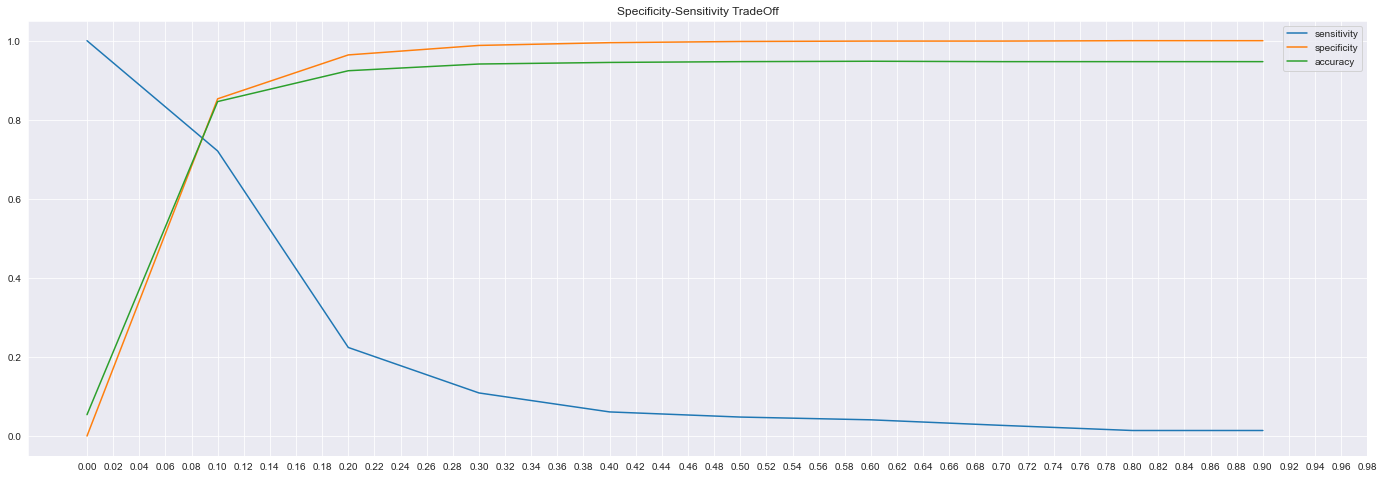

In [2866]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

#### The optimum probability cutoff for Logistic regression model is 0.13

In [2867]:
optimum_cutoff = 0.9
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[2579    0]
 [ 145    2]]

Confusion Matrix for test: 
 [[1114    2]
 [  53    0]]


In [2868]:
ROC_AUC_Score_train = round(roc_auc_score(y_train, y_train_pred_lr),3)
ROC_AUC_Score_test = round(roc_auc_score(y_test, y_test_pred_lr),3)

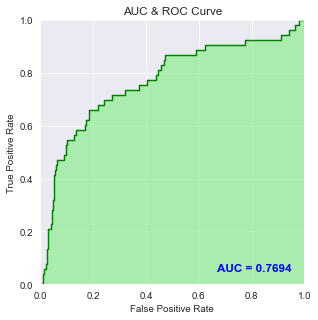

In [2869]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred_lr)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred_lr)

plt.figure(figsize=(5, 5), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [2870]:
Stats_df = Save_model_metrics(train_matrix, ' Train Logistic Regression Model with RFE at Optimum Cutoff', Stats_df, ROC_AUC_Score_train)
Stats_df = Save_model_metrics(test_matrix, 'Test Logistic Regression Model with RFE  at Optimum Cutoff', Stats_df, ROC_AUC_Score_test)

In [2871]:
Stats_df

Model  Accuracy  \
0                               Train Baseline Model     0.764   
1                                Test Baseline Model     0.756   
2             Train Baseline Model at Optimum Cutoff     0.827   
3              Test Baseline Model at Optimum Cutoff     0.813   
4   Train Logistic Regression Model with RFE at O...     0.947   
5  Test Logistic Regression Model with RFE  at Op...     0.953   

   Sensitivity/TruePositiveRate/Recall  Specificity/TrueNegativeRate  \
0                                0.871                         0.758   
1                                0.660                         0.761   
2                                0.837                         0.827   
3                                0.604                         0.823   
4                                0.014                         1.000   
5                                0.000                         0.998   

   Precision/PositivePredictiveValue  F1-score  ROC_AUC_Score  
0                              0.170     0.284          0.881  
1                              0.116     0.197          0.768  
2                              0.216     0.343          0.832  
3                              0.139     0.226          0.713  
4                              1.000     0.028          0.848  
5                              0.000       NaN          0.769

### Model 1 : Logistic Regression (Interpretable Model Summary)

#### Most important predictors of Churn, in order of importance and their coefficients

In [2872]:
## Most important predictors of Churn , in order of importance and their coefficients are as follows
lr_summary_html = logr_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

spl_ic_mou_8            -185.4181
const                    -52.7466
total_rech_data_amt_8     -3.0127
std_ic_t2f_mou_8          -1.6919
last_day_rch_amt_8        -1.0981
monthly_2g_8              -0.8042
max_rech_amt_6             0.3831
loc_ic_t2t_mou_6          -0.3773
aon                       -0.3045
count_rech_2g_6            0.2409
loc_og_t2c_mou_6          -0.2375
roam_ic_mou_6              0.2106
count_rech_3g_6            0.2017
total_rech_amt_data_7      0.1934
last_day_rch_amt_7         0.1281
vol_3g_mb_6                0.0736
Name: coef, dtype: float64

#### The above model could be used as the interpretable model for predicting telecom churn.

## PCA

In [2873]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train)
pca.components_

array([[ 0.35349298,  0.14952097,  0.27287981, ..., -0.10232437,
        -0.12382302, -0.08803472],
       [ 0.20000523, -0.00289687, -0.0315221 , ...,  0.42624438,
         0.33971148,  0.3516847 ],
       [-0.18967007, -0.27343217, -0.30190009, ..., -0.06489033,
        -0.00106828, -0.01256653],
       ...,
       [ 0.15907605,  0.1050938 ,  0.48582713, ...,  0.21805588,
        -0.00911174,  0.01432001],
       [ 0.6644467 , -0.25285845, -0.37935349, ...,  0.23324278,
         0.02054673,  0.00997041],
       [-0.40895549,  0.05779457,  0.06569845, ...,  0.51848213,
        -0.01920238,  0.01606759]])

In [2874]:
pca.explained_variance_ratio_

array([0.10492411, 0.07335237, 0.05834768, 0.0501978 , 0.04739547,
       0.04299599, 0.03926554, 0.03028975, 0.02817738, 0.02700785,
       0.0264897 , 0.02553235, 0.02482464, 0.02433803, 0.02279034,
       0.02196829, 0.02192705, 0.02097918, 0.02011751, 0.01991144,
       0.01953828, 0.01898495, 0.01829358, 0.01746139, 0.0169342 ,
       0.01657037, 0.01508233, 0.01490878, 0.01424915, 0.0130468 ,
       0.01267261, 0.01181579, 0.01146575, 0.01091875, 0.01063102,
       0.00945719, 0.00855105, 0.00820533, 0.00774549, 0.0061292 ,
       0.00367783, 0.00282766])

<BarContainer object of 42 artists>

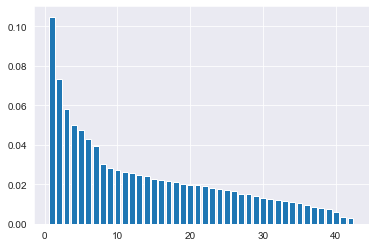

In [2875]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

### Making the scree plot

In [2876]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

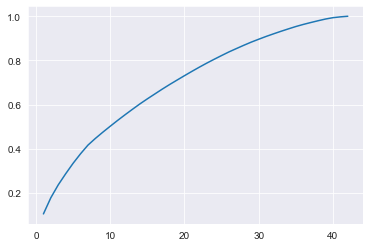

In [2877]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

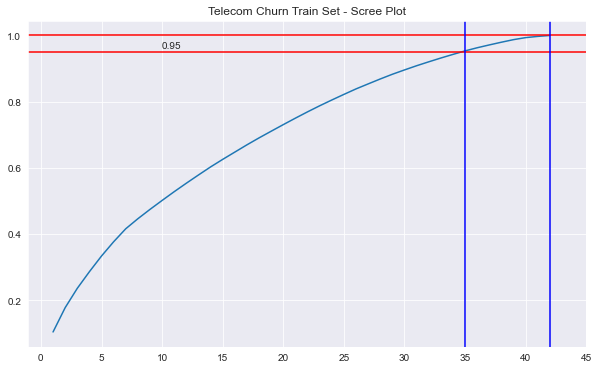

In [2878]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
sns.lineplot(np.arange(1,len(var_cum) + 1), var_cum)
plt.xticks(np.arange(0,50,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(35,color='b')  #**** 33 cols
plt.axvline(42,color='b')  #**** 40 cols
plt.text(10,0.96,'0.95')

plt.title('Telecom Churn Train Set - Scree Plot');

#### From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 35 principal components and 100% of variance is explained by the first 42 principal components.

## PCA with N components

In [2879]:
# Perform PCA using the first 42 components
pca_final = PCA(n_components=42, random_state=42)
transformed_data = pca_final.fit_transform(X_train)

In [2880]:
## new data
transformed_data.shape

(2726, 42)

## Making a dataframe out of it for convenience

In [2881]:
## checking..
df = pd.DataFrame(transformed_data)
df.head()

0         1         2         3         4         5         6   \
0  0.752817 -0.023453  0.792540 -0.771882  0.180036 -1.176634  0.569693   
1 -2.388214 -0.606634  0.543875 -0.460143  0.317025 -0.151261 -0.282689   
2 -2.047428 -0.933243  0.113112 -0.363340  0.182648 -0.337620 -0.223641   
3  0.419755 -0.321916 -3.362029 -1.293488 -0.078654  1.468362 -1.784467   
4  1.278105 -0.792425 -0.451084  2.275959 -2.038757  0.662428  1.932083   

         7         8         9         10        11        12        13  \
0  1.310854 -0.370359 -0.455480  0.379092 -0.101089  0.098478  1.090862   
1  0.062694  0.267725 -0.291159 -0.026011 -0.031057  0.041132 -0.327862   
2  0.278476  0.327515 -0.423943 -0.364129 -0.283412 -0.079169 -0.375192   
3 -1.421744  0.161022 -0.169023  1.587503 -4.155340  4.161665  2.079036   
4  0.419941 -0.657452 -0.919595 -0.493110 -0.544130 -0.540322  0.534447   

         14        15        16        17        18        19        20  \
0  0.152870 -0.268150 -0.293079 -0.380080 -0.406799  0.240115 -0.399298   
1 -0.188740  0.104388  0.095179  0.112571  0.171056  0.165343 -0.409795   
2 -0.928253 -0.105824  0.168268 -0.186789  0.009417 -0.362570  0.186432   
3 -0.639451 -0.337325  1.484499 -2.089981 -1.371925  0.489815  2.008866   
4 -0.560926 -0.355131  0.123590 -0.260978 -1.089369  0.252670  1.363045   

         21        22        23        24        25        26        27  \
0 -0.230241 -0.109516 -0.345657 -0.254342 -0.272611  0.041811 -0.005721   
1 -0.187544  0.075483 -0.117682  0.443570 -0.085696 -0.244353 -0.184503   
2  0.098026 -0.083931 -0.130502  0.388958  0.265559 -0.253474  0.234905   
3 -1.367758  1.117927  0.571962  0.124041 -0.023438  0.881569  0.805776   
4  0.181407 -1.404210  0.381465 -0.391955 -0.162117 -0.112695  0.162926   

         28        29        30        31        32        33        34  \
0 -0.320668 -0.368971  0.266084 -0.011736  0.320381 -0.010328 -0.341838   
1  0.035374  0.034949  0.330743  0.050969 -0.046388 -0.273031 -0.032335   
2  0.043569  0.032877  0.059004 -0.134101  0.036820  0.179886  0.063677   
3  0.331393 -0.290913  0.308192 -0.442224  0.205190  0.321900  0.444145   
4  0.029270 -0.172024  0.098165  0.681200 -0.533676  0.279392 -0.707766   

         35        36        37        38        39        40        41  
0  0.287732 -0.019552  0.344878  0.047656  0.480134  0.007899  0.058028  
1 -0.106407 -0.522267  0.165820 -0.355174  0.241350 -0.104160 -0.328346  
2  0.080694 -0.227328  0.114889 -0.234256  0.046805 -0.093735 -0.170790  
3  0.420911  1.362484  0.706942  1.127852 -0.971488 -0.159550  1.108202  
4 -0.012868  0.323539  0.543275 -0.156463 -0.263193 -0.149348 -0.086494

#### Adding proper column names & Concatenate with Y target column

In [2882]:
## Adding proper column names
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,43)], index = X_train.index)
## concatenate with Y Target column (train)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)
data_train_pca.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
41176  0.752817 -0.023453  0.792540 -0.771882  0.180036 -1.176634  0.569693   
42255 -2.388214 -0.606634  0.543875 -0.460143  0.317025 -0.151261 -0.282689   
55711 -2.047428 -0.933243  0.113112 -0.363340  0.182648 -0.337620 -0.223641   
59390  0.419755 -0.321916 -3.362029 -1.293488 -0.078654  1.468362 -1.784467   
42350  1.278105 -0.792425 -0.451084  2.275959 -2.038757  0.662428  1.932083   

           PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
41176  1.310854 -0.370359 -0.455480  0.379092 -0.101089  0.098478  1.090862   
42255  0.062694  0.267725 -0.291159 -0.026011 -0.031057  0.041132 -0.327862   
55711  0.278476  0.327515 -0.423943 -0.364129 -0.283412 -0.079169 -0.375192   
59390 -1.421744  0.161022 -0.169023  1.587503 -4.155340  4.161665  2.079036   
42350  0.419941 -0.657452 -0.919595 -0.493110 -0.544130 -0.540322  0.534447   

          PC_15     PC_16     PC_17     PC_18     PC_19     PC_20     PC_21  \
41176  0.152870 -0.268150 -0.293079 -0.380080 -0.406799  0.240115 -0.399298   
42255 -0.188740  0.104388  0.095179  0.112571  0.171056  0.165343 -0.409795   
55711 -0.928253 -0.105824  0.168268 -0.186789  0.009417 -0.362570  0.186432   
59390 -0.639451 -0.337325  1.484499 -2.089981 -1.371925  0.489815  2.008866   
42350 -0.560926 -0.355131  0.123590 -0.260978 -1.089369  0.252670  1.363045   

          PC_22     PC_23     PC_24     PC_25     PC_26     PC_27     PC_28  \
41176 -0.230241 -0.109516 -0.345657 -0.254342 -0.272611  0.041811 -0.005721   
42255 -0.187544  0.075483 -0.117682  0.443570 -0.085696 -0.244353 -0.184503   
55711  0.098026 -0.083931 -0.130502  0.388958  0.265559 -0.253474  0.234905   
59390 -1.367758  1.117927  0.571962  0.124041 -0.023438  0.881569  0.805776   
42350  0.181407 -1.404210  0.381465 -0.391955 -0.162117 -0.112695  0.162926   

          PC_29     PC_30     PC_31     PC_32     PC_33     PC_34     PC_35  \
41176 -0.320668 -0.368971  0.266084 -0.011736  0.320381 -0.010328 -0.341838   
42255  0.035374  0.034949  0.330743  0.050969 -0.046388 -0.273031 -0.032335   
55711  0.043569  0.032877  0.059004 -0.134101  0.036820  0.179886  0.063677   
59390  0.331393 -0.290913  0.308192 -0.442224  0.205190  0.321900  0.444145   
42350  0.029270 -0.172024  0.098165  0.681200 -0.533676  0.279392 -0.707766   

          PC_36     PC_37     PC_38     PC_39     PC_40     PC_41     PC_42  \
41176  0.287732 -0.019552  0.344878  0.047656  0.480134  0.007899  0.058028   
42255 -0.106407 -0.522267  0.165820 -0.355174  0.241350 -0.104160 -0.328346   
55711  0.080694 -0.227328  0.114889 -0.234256  0.046805 -0.093735 -0.170790   
59390  0.420911  1.362484  0.706942  1.127852 -0.971488 -0.159550  1.108202   
42350 -0.012868  0.323539  0.543275 -0.156463 -0.263193 -0.149348 -0.086494   

       churn_probability  
41176                  0  
42255                  0  
55711                  0  
59390                  0  
42350                  0

## Plotting the data

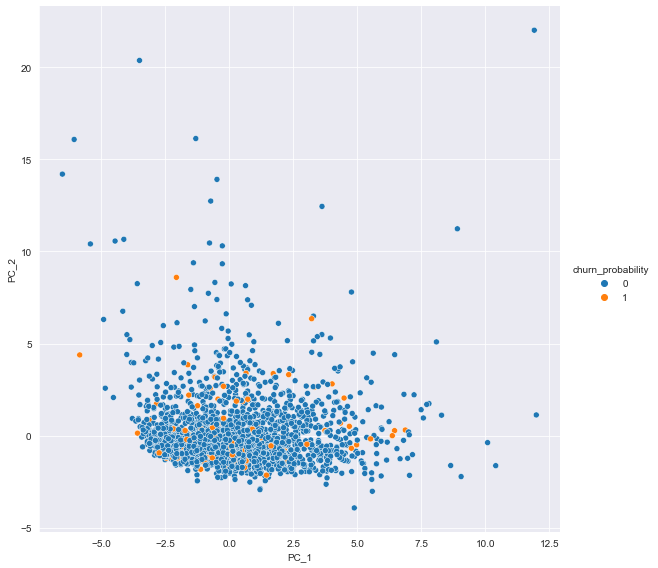

In [2883]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8);

### Model 2 :Telecom Churn - Logistic Regression with PCA Model

In [2884]:
# X,y Split
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca_b = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca_b.fit(X_train_pca,y_train_pca )

LogisticRegression(class_weight='balanced', random_state=100)

In [2885]:
# y_train predictions
y_train_pred_lr_pca = lr_pca_b.predict(X_train_pca)
y_train_pred_lr_pca[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [2886]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca_b.predict(X_test_pca)
y_test_pred_lr_pca[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

#### Baseline Performance

In [2887]:
train_matrix

array([[2579,    0],
       [ 145,    2]], dtype=int64)

In [2888]:
test_matrix

array([[1114,    2],
       [  53,    0]], dtype=int64)

In [2889]:
ROC_AUC_Score_train = round(roc_auc_score(y_train, y_train_pred_lr_pca),3)
ROC_AUC_Score_test = round(roc_auc_score(y_test, y_test_pred_lr_pca),3)

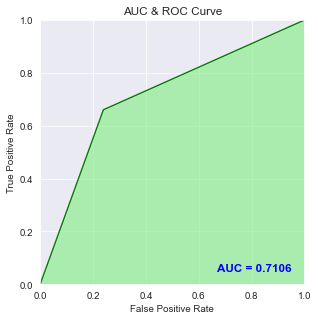

In [2890]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred_lr_pca)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred_lr_pca)

plt.figure(figsize=(5, 5), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [2891]:
## Logistic Regression with PCA Model (Baseline)
Stats_df = Save_model_metrics(train_matrix, ' Train Logistic Regression with PCA Model (Baseline)', Stats_df, ROC_AUC_Score_train)
Stats_df = Save_model_metrics(test_matrix, 'Test Logistic Regression with PCA Model (Baseline)', Stats_df, ROC_AUC_Score_test)

In [2892]:
Stats_df

Model  Accuracy  \
0                               Train Baseline Model     0.764   
1                                Test Baseline Model     0.756   
2             Train Baseline Model at Optimum Cutoff     0.827   
3              Test Baseline Model at Optimum Cutoff     0.813   
4   Train Logistic Regression Model with RFE at O...     0.947   
5  Test Logistic Regression Model with RFE  at Op...     0.953   
6   Train Logistic Regression with PCA Model (Bas...     0.947   
7  Test Logistic Regression with PCA Model (Basel...     0.953   

   Sensitivity/TruePositiveRate/Recall  Specificity/TrueNegativeRate  \
0                                0.871                         0.758   
1                                0.660                         0.761   
2                                0.837                         0.827   
3                                0.604                         0.823   
4                                0.014                         1.000   
5                                0.000                         0.998   
6                                0.014                         1.000   
7                                0.000                         0.998   

   Precision/PositivePredictiveValue  F1-score  ROC_AUC_Score  
0                              0.170     0.284          0.881  
1                              0.116     0.197          0.768  
2                              0.216     0.343          0.832  
3                              0.139     0.226          0.713  
4                              1.000     0.028          0.848  
5                              0.000       NaN          0.769  
6                              1.000     0.028          0.814  
7                              0.000       NaN          0.711

#### Hyperparameter Tuning

In [2893]:
# Creating a Logistic regression model using pca
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [2894]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [2895]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8364732690946037
Best Parameters : {'C': 0, 'penalty': 'none'}


In [2896]:
# Modelling using the best Logistic regression model using pca estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [2897]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [2898]:
## Model Performance after Hyper Parameter Tuning
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

In [2899]:
train_matrix

array([[1968,  611],
       [  19,  128]], dtype=int64)

In [2900]:
test_matrix

array([[851, 265],
       [ 17,  36]], dtype=int64)

In [2901]:
#Logistic regression model using pca
ROC_AUC_Score_train = round(roc_auc_score(y_train, y_train_pred_lr_pca_best),3)
ROC_AUC_Score_test = round(roc_auc_score(y_test, y_test_pred_lr_pca_best),3)

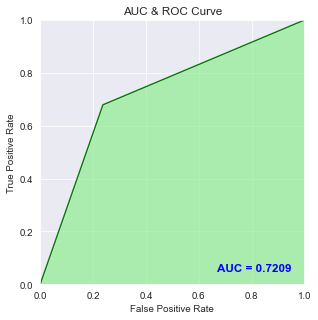

In [2902]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred_lr_pca_best)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred_lr_pca_best)

plt.figure(figsize=(5, 5), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [2903]:
## Logistic Regression with PCA Model (Hyper Parameter Tuning)
Stats_df = Save_model_metrics(train_matrix, ' Train Logistic Regression with PCA Model (Hyper Parameter Tuning)', Stats_df, ROC_AUC_Score_train)
Stats_df = Save_model_metrics(test_matrix, 'Test Logistic Regression with PCA Model (Hyper Parameter Tuning)', Stats_df, ROC_AUC_Score_test)

In [2904]:
Stats_df

Model  Accuracy  \
0                               Train Baseline Model     0.764   
1                                Test Baseline Model     0.756   
2             Train Baseline Model at Optimum Cutoff     0.827   
3              Test Baseline Model at Optimum Cutoff     0.813   
4   Train Logistic Regression Model with RFE at O...     0.947   
5  Test Logistic Regression Model with RFE  at Op...     0.953   
6   Train Logistic Regression with PCA Model (Bas...     0.947   
7  Test Logistic Regression with PCA Model (Basel...     0.953   
8   Train Logistic Regression with PCA Model (Hyp...     0.769   
9  Test Logistic Regression with PCA Model (Hyper...     0.759   

   Sensitivity/TruePositiveRate/Recall  Specificity/TrueNegativeRate  \
0                                0.871                         0.758   
1                                0.660                         0.761   
2                                0.837                         0.827   
3                                0.604                         0.823   
4                                0.014                         1.000   
5                                0.000                         0.998   
6                                0.014                         1.000   
7                                0.000                         0.998   
8                                0.871                         0.763   
9                                0.679                         0.763   

   Precision/PositivePredictiveValue  F1-score  ROC_AUC_Score  
0                              0.170     0.284          0.881  
1                              0.116     0.197          0.768  
2                              0.216     0.343          0.832  
3                              0.139     0.226          0.713  
4                              1.000     0.028          0.848  
5                              0.000       NaN          0.769  
6                              1.000     0.028          0.814  
7                              0.000       NaN          0.711  
8                              0.173     0.289          0.817  
9                              0.120     0.204          0.721

### Model 3 : PCA + Random Forest

In [2905]:
from sklearn.ensemble import RandomForestClassifier
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.051347881899871634,
                                     1: 0.9486521181001284},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [2906]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.051347881899871634,
                                                            1: 0.9486521181001284},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [2907]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.740296059456828
Best Parameters : {'max_depth': 5, 'min_samples_leaf': 30, 'n_estimators': 100}


In [2908]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:10]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [2909]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:10]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [2910]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned
train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

In [2911]:
train_matrix

array([[2412,  167],
       [  18,  129]], dtype=int64)

In [2912]:
test_matrix

array([[1037,   79],
       [  36,   17]], dtype=int64)

In [2913]:
ROC_AUC_Score_train = round(roc_auc_score(y_train, y_train_pred_pca_rf_best),3)
ROC_AUC_Score_test = round(roc_auc_score(y_test, y_test_pred_pca_rf_best),3)

The ROC curve represents the true positive rate and the false positive rate at different classification thresholds and the AUC represents the aggregate measure of the machine learning model across all possible classification thresholds.

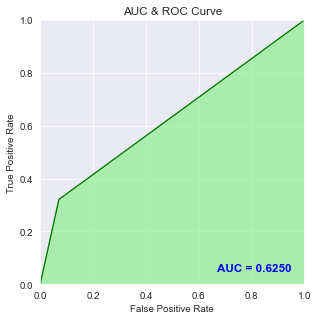

In [2914]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred_pca_rf_best)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred_pca_rf_best)

plt.figure(figsize=(5, 5), dpi=70)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [2915]:
## PCA + RandomForest - Hyper Parameter Tuning
Stats_df = Save_model_metrics(train_matrix, ' Train PCA + RandomForest (Hyper Parameter Tuning)', Stats_df, ROC_AUC_Score_train)
Stats_df = Save_model_metrics(test_matrix, 'Test PCA + RandomForest (Hyper Parameter Tuning)', Stats_df, ROC_AUC_Score_test)

In [2916]:
Stats_df

Model  Accuracy  \
0                                Train Baseline Model     0.764   
1                                 Test Baseline Model     0.756   
2              Train Baseline Model at Optimum Cutoff     0.827   
3               Test Baseline Model at Optimum Cutoff     0.813   
4    Train Logistic Regression Model with RFE at O...     0.947   
5   Test Logistic Regression Model with RFE  at Op...     0.953   
6    Train Logistic Regression with PCA Model (Bas...     0.947   
7   Test Logistic Regression with PCA Model (Basel...     0.953   
8    Train Logistic Regression with PCA Model (Hyp...     0.769   
9   Test Logistic Regression with PCA Model (Hyper...     0.759   
10   Train PCA + RandomForest (Hyper Parameter Tun...     0.932   
11   Test PCA + RandomForest (Hyper Parameter Tuning)     0.902   

    Sensitivity/TruePositiveRate/Recall  Specificity/TrueNegativeRate  \
0                                 0.871                         0.758   
1                                 0.660                         0.761   
2                                 0.837                         0.827   
3                                 0.604                         0.823   
4                                 0.014                         1.000   
5                                 0.000                         0.998   
6                                 0.014                         1.000   
7                                 0.000                         0.998   
8                                 0.871                         0.763   
9                                 0.679                         0.763   
10                                0.878                         0.935   
11                                0.321                         0.929   

    Precision/PositivePredictiveValue  F1-score  ROC_AUC_Score  
0                               0.170     0.284          0.881  
1                               0.116     0.197          0.768  
2                               0.216     0.343          0.832  
3                               0.139     0.226          0.713  
4                               1.000     0.028          0.848  
5                               0.000       NaN          0.769  
6                               1.000     0.028          0.814  
7                               0.000       NaN          0.711  
8                               0.173     0.289          0.817  
9                               0.120     0.204          0.721  
10                              0.436     0.583          0.906  
11                              0.177     0.228          0.625

#### Based on above performance parameter we can select the model

## Recommendations

#### Most Important Predictors of churn


In [2917]:
lr_results

coef     std err      z  P>|z|      [0.025  \
const                  -52.7466   31300.000 -0.002  0.999  -61400.000   
std_ic_t2f_mou_8        -1.6919       0.709 -2.387  0.017      -3.081   
aon                     -0.3045       0.114 -2.674  0.007      -0.528   
monthly_2g_8            -0.8042       0.238 -3.378  0.001      -1.271   
vol_3g_mb_6              0.0736       0.123  0.601  0.548      -0.167   
count_rech_3g_6          0.2017       0.104  1.934  0.053      -0.003   
count_rech_2g_6          0.2409       0.108  2.228  0.026       0.029   
last_day_rch_amt_8      -1.0981       0.197 -5.565  0.000      -1.485   
last_day_rch_amt_7       0.1281       0.083  1.537  0.124      -0.035   
max_rech_amt_6           0.3831       0.096  3.978  0.000       0.194   
spl_ic_mou_8          -185.4181  120000.000 -0.002  0.999 -235000.000   
total_rech_amt_data_7    0.1934       0.106  1.825  0.068      -0.014   
loc_ic_t2t_mou_6        -0.3773       0.206 -1.831  0.067      -0.781   
total_rech_data_amt_8   -3.0127       0.460 -6.551  0.000      -3.914   
roam_ic_mou_6            0.2106       0.075  2.808  0.005       0.064   
loc_og_t2c_mou_6        -0.2375       0.156 -1.521  0.128      -0.543   

                           0.975]  
const                   61300.000  
std_ic_t2f_mou_8           -0.303  
aon                        -0.081  
monthly_2g_8               -0.338  
vol_3g_mb_6                 0.314  
count_rech_3g_6             0.406  
count_rech_2g_6             0.453  
last_day_rch_amt_8         -0.711  
last_day_rch_amt_7          0.291  
max_rech_amt_6              0.572  
spl_ic_mou_8           235000.000  
total_rech_amt_data_7       0.401  
loc_ic_t2t_mou_6            0.027  
total_rech_data_amt_8      -2.111  
roam_ic_mou_6               0.358  
loc_og_t2c_mou_6            0.068


#### Based on Accuracy of approx. 90% + , as per primary evalutation metric, Logistic regression with PCA  is the recommended model, with ROC_AUO score > 70% on Test

## Predictions for solution.csv

In [2918]:
df_test=pd.read_csv('test.csv')

#### Scale the test dataset

In [2919]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [2920]:
df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [2921]:
### Seems these are date field from its name so lets change its dtype
dateCols_test = df_test.select_dtypes(['object']).columns
df_test[dateCols_test].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/26/2014           8/24/2014   
1           6/19/2014           7/16/2014           8/24/2014   
2           6/29/2014           7/27/2014           8/28/2014   
3           6/25/2014           7/30/2014           8/24/2014   
4           6/29/2014           7/29/2014           8/30/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                      NaN                      NaN                      NaN  
1                      NaN                      NaN                      NaN  
2                      NaN                      NaN                      NaN  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [2922]:
# dropping the date columns as per train data set, as it will not help in prediction
df_test.drop(dateCols_test,1,inplace=True)
df_test.shape

(30000, 162)

In [2923]:
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#scaler_test = StandardScaler()

In [2924]:
# Calculate total recharge data amount for months 6 and 7
df_test['total_rech_amt_data_6'] = df_test['total_rech_data_6'] * df_test['av_rech_amt_data_6']
df_test['total_rech_amt_data_7'] = df_test['total_rech_data_7'] * df_test['av_rech_amt_data_7']

In [2925]:
df_test['total_rech_data_amt_6'] = df_test['av_rech_amt_data_6'] * df_test['total_rech_data_6']
df_test['total_rech_data_amt_7'] = df_test['av_rech_amt_data_7'] * df_test['total_rech_data_7']
df_test['total_rech_data_amt_8'] = df_test['av_rech_amt_data_8'] * df_test['total_rech_data_8']

In [2926]:
# following the naming convention of other columns, renaming below columns accordingly
df_test = df_test.rename({'aug_vbc_3g' : 'vbc_3g_8'}, axis=1)

In [2927]:
df_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0  69999        109             0.0             0.0             0.0   91.882   
1  70000        109             0.0             0.0             0.0  414.168   
2  70001        109             0.0             0.0             0.0  329.844   
3  70002        109             0.0             0.0             0.0   43.550   
4  70003        109             0.0             0.0             0.0  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              2.05             42.03              7.68             26.43   
1              0.00              0.00             23.76             17.68   
2              0.00              0.00              0.00              0.00   
3              0.00             37.09             94.36              0.00   
4            686.11      

In [2928]:
df_test_new = df_test[['arpu_6','onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_t2c_mou_7','std_og_t2f_mou_6','isd_og_mou_6','spl_og_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','spl_ic_mou_6','spl_ic_mou_8','isd_ic_mou_6','total_rech_num_6','max_rech_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','count_rech_2g_6','count_rech_3g_6','vol_2g_mb_6','vol_3g_mb_6','night_pck_user_6','monthly_2g_6','monthly_2g_7','monthly_2g_8','fb_user_6','aon','vbc_3g_8','total_rech_amt_data_6','total_rech_amt_data_7','total_rech_data_amt_8']].copy()

In [2929]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   arpu_6                 30000 non-null  float64
 1   onnet_mou_6            28831 non-null  float64
 2   offnet_mou_6           28831 non-null  float64
 3   roam_ic_mou_6          28831 non-null  float64
 4   roam_ic_mou_7          28828 non-null  float64
 5   roam_ic_mou_8          28325 non-null  float64
 6   loc_og_t2m_mou_6       28831 non-null  float64
 7   loc_og_t2f_mou_6       28831 non-null  float64
 8   loc_og_t2c_mou_6       28831 non-null  float64
 9   loc_og_t2c_mou_7       28828 non-null  float64
 10  std_og_t2f_mou_6       28831 non-null  float64
 11  isd_og_mou_6           28831 non-null  float64
 12  spl_og_mou_6           28831 non-null  float64
 13  loc_ic_t2t_mou_6       28831 non-null  float64
 14  loc_ic_t2m_mou_6       28831 non-null  float64
 15  lo

In [2930]:
# check missing values in percentage > 70%
total_test = df_test_new.isnull().sum().sort_values(ascending=False)
percent = (100*df_test_new.isnull().sum()/df_test_new.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Percent > 0]

Total    Percent
count_rech_2g_6          0.0  74.716667
count_rech_3g_6          0.0  74.716667
spl_ic_mou_6             0.0   3.896667
spl_ic_mou_8             0.0   5.583333
isd_ic_mou_6             0.0   3.896667
fb_user_6                0.0  74.716667
total_rech_amt_data_6    0.0  74.716667
total_rech_amt_data_7    0.0  74.313333
night_pck_user_6         0.0  74.716667
loc_og_t2m_mou_6         0.0   3.896667
loc_og_t2f_mou_6         0.0   3.896667
loc_og_t2c_mou_6         0.0   3.896667
loc_og_t2c_mou_7         0.0   3.906667
std_og_t2f_mou_6         0.0   3.896667
onnet_mou_6              0.0   3.896667
offnet_mou_6             0.0   3.896667
roam_ic_mou_6            0.0   3.896667
roam_ic_mou_7            0.0   3.906667
roam_ic_mou_8            0.0   5.583333
std_ic_t2t_mou_6         0.0   3.896667
std_ic_t2m_mou_6         0.0   3.896667
std_ic_t2f_mou_6         0.0   3.896667
std_ic_t2f_mou_7         0.0   3.906667
std_ic_t2f_mou_8         0.0   5.583333
loc_ic_t2f_mou_6         0.0   3.896667
loc_ic_t2m_mou_6         0.0   3.896667
isd_og_mou_6             0.0   3.896667
spl_og_mou_6             0.0   3.896667
loc_ic_t2t_mou_6         0.0   3.896667
total_rech_data_amt_8    0.0  73.593333

In [2931]:
df_test_new['count_rech_2g_6']=df_test_new['count_rech_2g_6'].fillna(0)

In [2932]:
df_test_new['count_rech_3g_6']=df_test_new['count_rech_3g_6'].fillna(0)

In [2933]:
df_test_new['fb_user_6']=df_test_new['fb_user_6'].fillna(0)

In [2934]:
df_test_new['total_rech_amt_data_6']=df_test_new['total_rech_amt_data_6'].fillna(0)

In [2935]:
df_test_new['total_rech_amt_data_7']=df_test_new['total_rech_amt_data_7'].fillna(0)

In [2936]:
df_test_new['night_pck_user_6']=df_test_new['night_pck_user_6'].fillna(0)

In [2937]:
df_test_new['total_rech_data_amt_8']=df_test_new['total_rech_data_amt_8'].fillna(0)

In [2938]:
#df_test_new['']=df_test_new[''].fillna(0)

In [2939]:
MOU_cols=df_test_new.columns[df_test_new.columns.str.contains('mou')]
MOU_cols

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'std_og_t2f_mou_6',
       'isd_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_6'],
      dtype='object')

In [2940]:
df_test_new[MOU_cols] = df_test_new[MOU_cols].fillna(0)

In [2941]:
# only transform on test data
#X_test[cols]=scaler.transform(X_test[cols])

df_test_new[cols]=scaler.transform(df_test_new[cols])

In [2942]:
# Test Prediction
X_test_pca_pred = pca_final.transform(df_test_new)

In [2943]:
y_test_pred_lr_pca_pred = lr_pca_b.predict(X_test_pca_pred)

In [2944]:
y_test_pred_lr_pca_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [2945]:
solution_csv_df = df_test.copy()

In [2946]:
solution_csv_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0  69999        109             0.0             0.0             0.0   91.882   
1  70000        109             0.0             0.0             0.0  414.168   
2  70001        109             0.0             0.0             0.0  329.844   
3  70002        109             0.0             0.0             0.0   43.550   
4  70003        109             0.0             0.0             0.0  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              2.05             42.03              7.68             26.43   
1              0.00              0.00             23.76             17.68   
2              0.00              0.00              0.00              0.00   
3              0.00             37.09             94.36              0.00   
4            686.11      

In [2947]:
result_Churn_df = pd.DataFrame(data=y_test_pred_lr_pca_pred, columns=["churn_probability"])
result_Churn_df.head()

churn_probability
0                  0
1                  0
2                  1
3                  1
4                  0

In [2948]:
solution_csv_df = pd.concat([solution_csv_df, result_Churn_df], axis=1)

In [2949]:
solution_csv_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0  69999        109             0.0             0.0             0.0   91.882   
1  70000        109             0.0             0.0             0.0  414.168   
2  70001        109             0.0             0.0             0.0  329.844   
3  70002        109             0.0             0.0             0.0   43.550   
4  70003        109             0.0             0.0             0.0  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              2.05             42.03              7.68             26.43   
1              0.00              0.00             23.76             17.68   
2              0.00              0.00              0.00              0.00   
3              0.00             37.09             94.36              0.00   
4            686.11      

In [2950]:
#only 2 fields as per required solution sample
solution_csv_df = solution_csv_df[["id","churn_probability"]].copy()

In [2951]:
solution_csv_df.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  1
4  70003                  0

In [2953]:
solution_csv_df.to_csv('solution.csv',index=False)

### This Solution CSV file will be uploaded as requested.